<div
  style="
    display: flex;
    justify-content: center;
    flex-direction: column;
    align-items: center;
  "
>
<div style="width: 400px; padding: 20px; background: #111; border: 1px solid #333; color: #eee">
  <p style="opacity: 0.5; margin-bottom: -10px"><i>TDT4173 Machine Learning 2023</i></p>
  <h1 style="margin-bottom: -5px"><b>Long Notebook</b></h1>
  <h3>Kaggle Name: Neural Net Ninjas</h3>
  <br />
  <h3>Team Members:</h3>
  <table style="margin: 0 auto; width: 100%; text-align: left">
    <tr style="background: #222">
      <th style="border-width: 0.5px; border-color: #555">Name</th>
      <th style="border-width: 0.5px; border-color: #555">Student ID</th>
    </tr>
    <tr>
      <td style="border-width: 0.5px; border-color: #555">Antonsen Eggen, Sivert</td>
      <td style="border-width: 0.5px; border-color: #555">123 45 678</td>
    </tr>
    <tr>
      <td style="border-width: 0.5px; border-color: #555">Broch Grude, Kristoffer VI Nicolay</td>
      <td style="border-width: 0.5px; border-color: #555">123 45 678</td>
    </tr>
    <tr>
      <td style="border-width: 0.5px; border-color: #555">Raa, Mathias</td>
      <td style="border-width: 0.5px; border-color: #555">123 45 678</td>
    </tr>
  </table>
  </div>
</div>

---

### Outline
* [1 – Setup & Utils](#1)
* [2 – Exploratory Data Analysis](#2)
    * [2.1 – Data Overview](#2.1)
    * [2.2 – Data Cleaning](#2.2)
    * [2.3 – Data Visualization](#2.3)
* [3 – Preprocessing](#3)
    * [3.1 – Feature Selection](#3.1)
* [4 – Modeling](#4)
    * [4.1 – Model Selection](#4.1)
    * [4.2 – Model Evaluation](#4.2)
* [5 – Postprocessing](#5)
* [6 – Conclusion](#6)

# 1 – Setup & Utils

In [2]:
# Utils
from IPython.utils import io
import os

# Data
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_predict, KFold, train_test_split

# Models
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.common import space

import tensorflow as tf

import lightgbm as lgb
import xgboost as xgb
import catboost as cb

import scipy.optimize as opt

In [8]:
def scale_data(data, cols=None):
    """
    Scale model-data using MinMaxScaler
    """
    
    if cols is None:
        ignore_cols = [
            "location",
            "dew_or_rime:idx",
            "is_day:idx",
            "is_in_shadow:idx",
            "pv_measurement",
            "data_type",
        ]

        cols = [col for col in data.columns if col not in ignore_cols]

    X_scaler = MinMaxScaler()
    X_scaler = X_scaler.fit(
        data[data["data_type"].isin(["observed", "estimated"])][cols]
    )
    y_scaler = MinMaxScaler()
    y_scaler = y_scaler.fit(
        data[data["data_type"].isin(["observed", "estimated"])][["pv_measurement"]]
    )

    data_copy = data.copy()

    data_copy[cols] = X_scaler.transform(data_copy[cols])
    data_copy[["pv_measurement"]] = y_scaler.transform(data[["pv_measurement"]])

    return data_copy, X_scaler, y_scaler

# 2 – Exploratory Data Analysis

## 2.1 – Domain Knowledge

#### Problem and provider

The problem is to build a model that can predict solar erngy production for every hour of the next day. 
The data provided is from ANEO, an energy producer and service provider with headquarters in Trondheim Norway

#### Domain

Solar energy is the energy that the sun gives trough radiation, and sun related statistics is therefore off course relevant for the electrity that solar panals are able to produce. Solar panels cannot convert 100% of the energy as their is some loss, and the sun radiation during a time period is thus an upper limit of what the production can be in that period. Radiation is blocked when there are clouds, thick weather like snow or rain amongst other things, so the scale of this things at given time periods will also affect solar panel production. In addition, since the sun goes down during the night, there is almost no clear radition, so energy production during the night will be lower or nothing at all. Thus, solar energy production is cyclic in it's nature. The same can be said for the different seasons, as there generally is higner radition during the summer than the winter, so the production might have seasonal differences.

The provided data consists of 3 different location A, B and C. Since the locations can have different installations of solar panels, there are probably differences in the amount that they produce just because of the scale of the operation at each location.

## 2.2 – Data Quality

## 2.3 - Data Set Time Scale Analysis

### 2.3.1 - Graph of dateset split over time per location

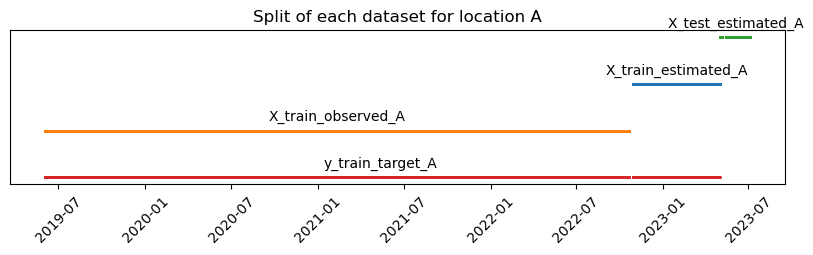

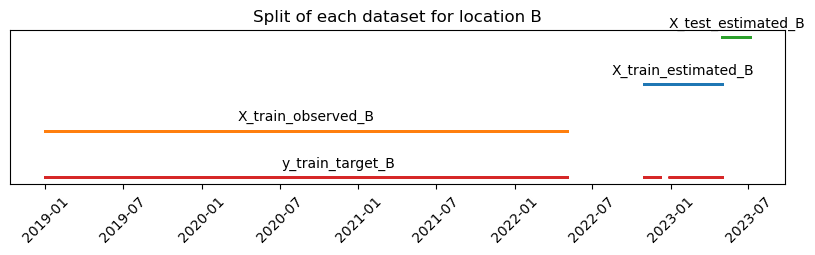

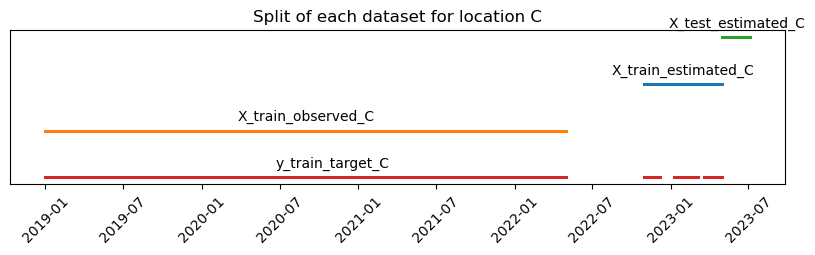

In [ ]:
# Graph plotting a point for every row in al lthe datesets with y value equal to 1 and x axis equal to "date_calc" or time collumn

# Define a list of locations
locations = ['A', 'B', 'C']

# Create a loop to plot for each location
for location in locations:
    # Load the data for the current location
    X_train_estimated = globals()["X_train_estimated_" + location]
    X_train_observed = globals()["X_train_observed_" + location]
    X_test_estimated = globals()["X_test_estimated_" + location]
    y_train_target = globals()["y_train_target_" + location]
    
    # Set size of the plot as a narrow rectangle
    plt.figure(figsize=(10, 2))

    # Plot the lines for the current location
    plt.scatter(X_train_estimated['date_forecast'], np.ones(len(X_train_estimated)) * 0.3, s=1)
    plt.scatter(X_train_observed['date_forecast'], np.ones(len(X_train_observed)) * 0.2, s=1)
    plt.scatter(X_test_estimated['date_forecast'], np.ones(len(X_test_estimated)) * 0.4, s=1)
    plt.scatter(y_train_target['time'], np.ones(len(y_train_target)) * 0.1, s=1)

    # Hide the y axis
    plt.yticks([])

    # Rotate the x axis labels
    plt.xticks(rotation=45)

    # Add legend
    #plt.legend(['X_train_estimated_' + location, 'X_train_observed_' + location, 'X_test_estimated_' + location, 'y_train_target_' + location])

    # Add title
    plt.title('Split of each dataset for location ' + location)

    # Add the name of the dataset above the scatter plot
    plt.text(X_train_estimated['date_forecast'].iloc[len(X_train_estimated) // 2], 0.32, 'X_train_estimated_' + location, ha='center')
    plt.text(X_train_observed['date_forecast'].iloc[len(X_train_observed) // 2], 0.22, 'X_train_observed_' + location, ha='center')
    plt.text(X_test_estimated['date_forecast'].iloc[len(X_test_estimated) // 2], 0.42, 'X_test_estimated_' + location, ha='center')
    plt.text(y_train_target['time'].iloc[len(y_train_target) // 2], 0.12, 'y_train_target_' + location, ha='center')



    plt.show()

### 2.3.2 - Graph of all dateset split over time 

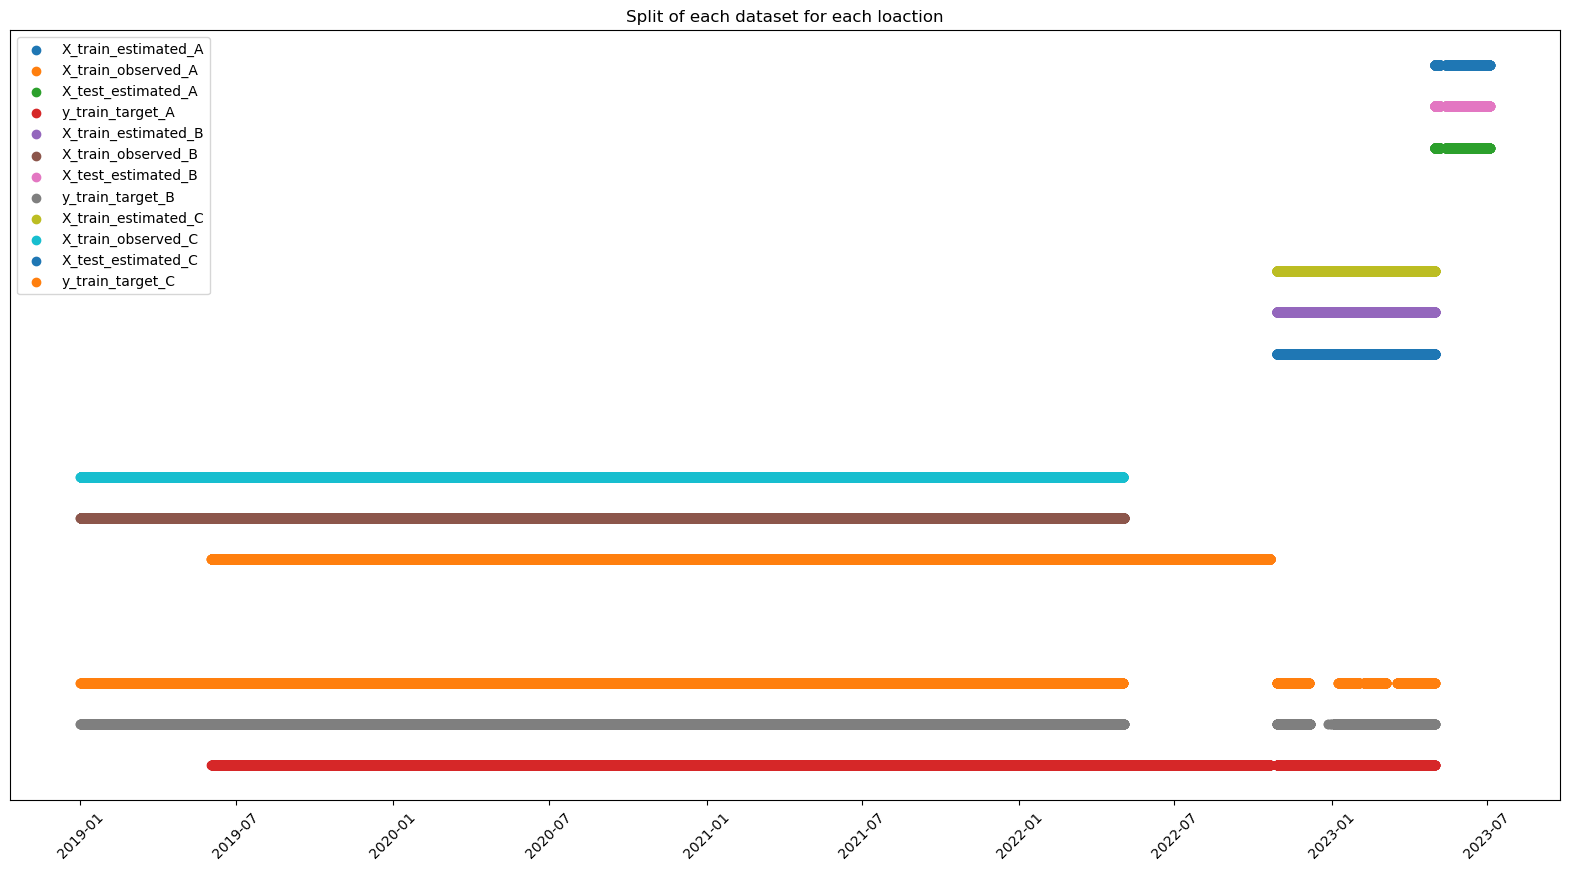

In [ ]:
# Graph plotting a point for every row in X_train_estimated_A with y value equal to 1 and x axis equal to "date_forecast" colum

# Set size of the plot
plt.figure(figsize=(20, 10))

# Plot the lines for location A   

plt.scatter(X_train_estimated_A['date_forecast'], np.ones(len(X_train_estimated_A))* 0.3)
plt.scatter(X_train_observed_A['date_forecast'], np.ones(len(X_train_observed_A))* 0.2)
plt.scatter(X_test_estimated_A['date_forecast'], np.ones(len(X_test_estimated_A))* 0.4)
plt.scatter(y_train_target_A['time'], np.ones(len(y_train_target_A))* 0.1)

# Plot the lines for location B
plt.scatter(X_train_estimated_B['date_forecast'], np.ones(len(X_train_estimated_B))*0.32)
plt.scatter(X_train_observed_B['date_forecast'], np.ones(len(X_train_observed_B))*0.22)
plt.scatter(X_test_estimated_B['date_forecast'], np.ones(len(X_test_estimated_B))*0.42)
plt.scatter(y_train_target_B['time'], np.ones(len(y_train_target_B))*0.12)

# Plot the lines for location C
plt.scatter(X_train_estimated_C['date_forecast'], np.ones(len(X_train_estimated_C))*0.34)
plt.scatter(X_train_observed_C['date_forecast'], np.ones(len(X_train_observed_C))*0.24)
plt.scatter(X_test_estimated_C['date_forecast'], np.ones(len(X_test_estimated_C))*0.44)
plt.scatter(y_train_target_C['time'], np.ones(len(y_train_target_C))*0.14)

# Hide the y axis
plt.yticks([])

# Rotate the x axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(['X_train_estimated_A', 'X_train_observed_A', 'X_test_estimated_A', 'y_train_target_A',
            'X_train_estimated_B', 'X_train_observed_B', 'X_test_estimated_B', 'y_train_target_B',
            'X_train_estimated_C', 'X_train_observed_C', 'X_test_estimated_C', 'y_train_target_C'], loc='upper left')

# Add title
plt.title('Split of each dataset for each loaction')


plt.show()

## 2.4 – Feature Exploration

### 2.4.1 Correlation Map - Correlation Between Features per Location

##### 2.4.1.1  Location A

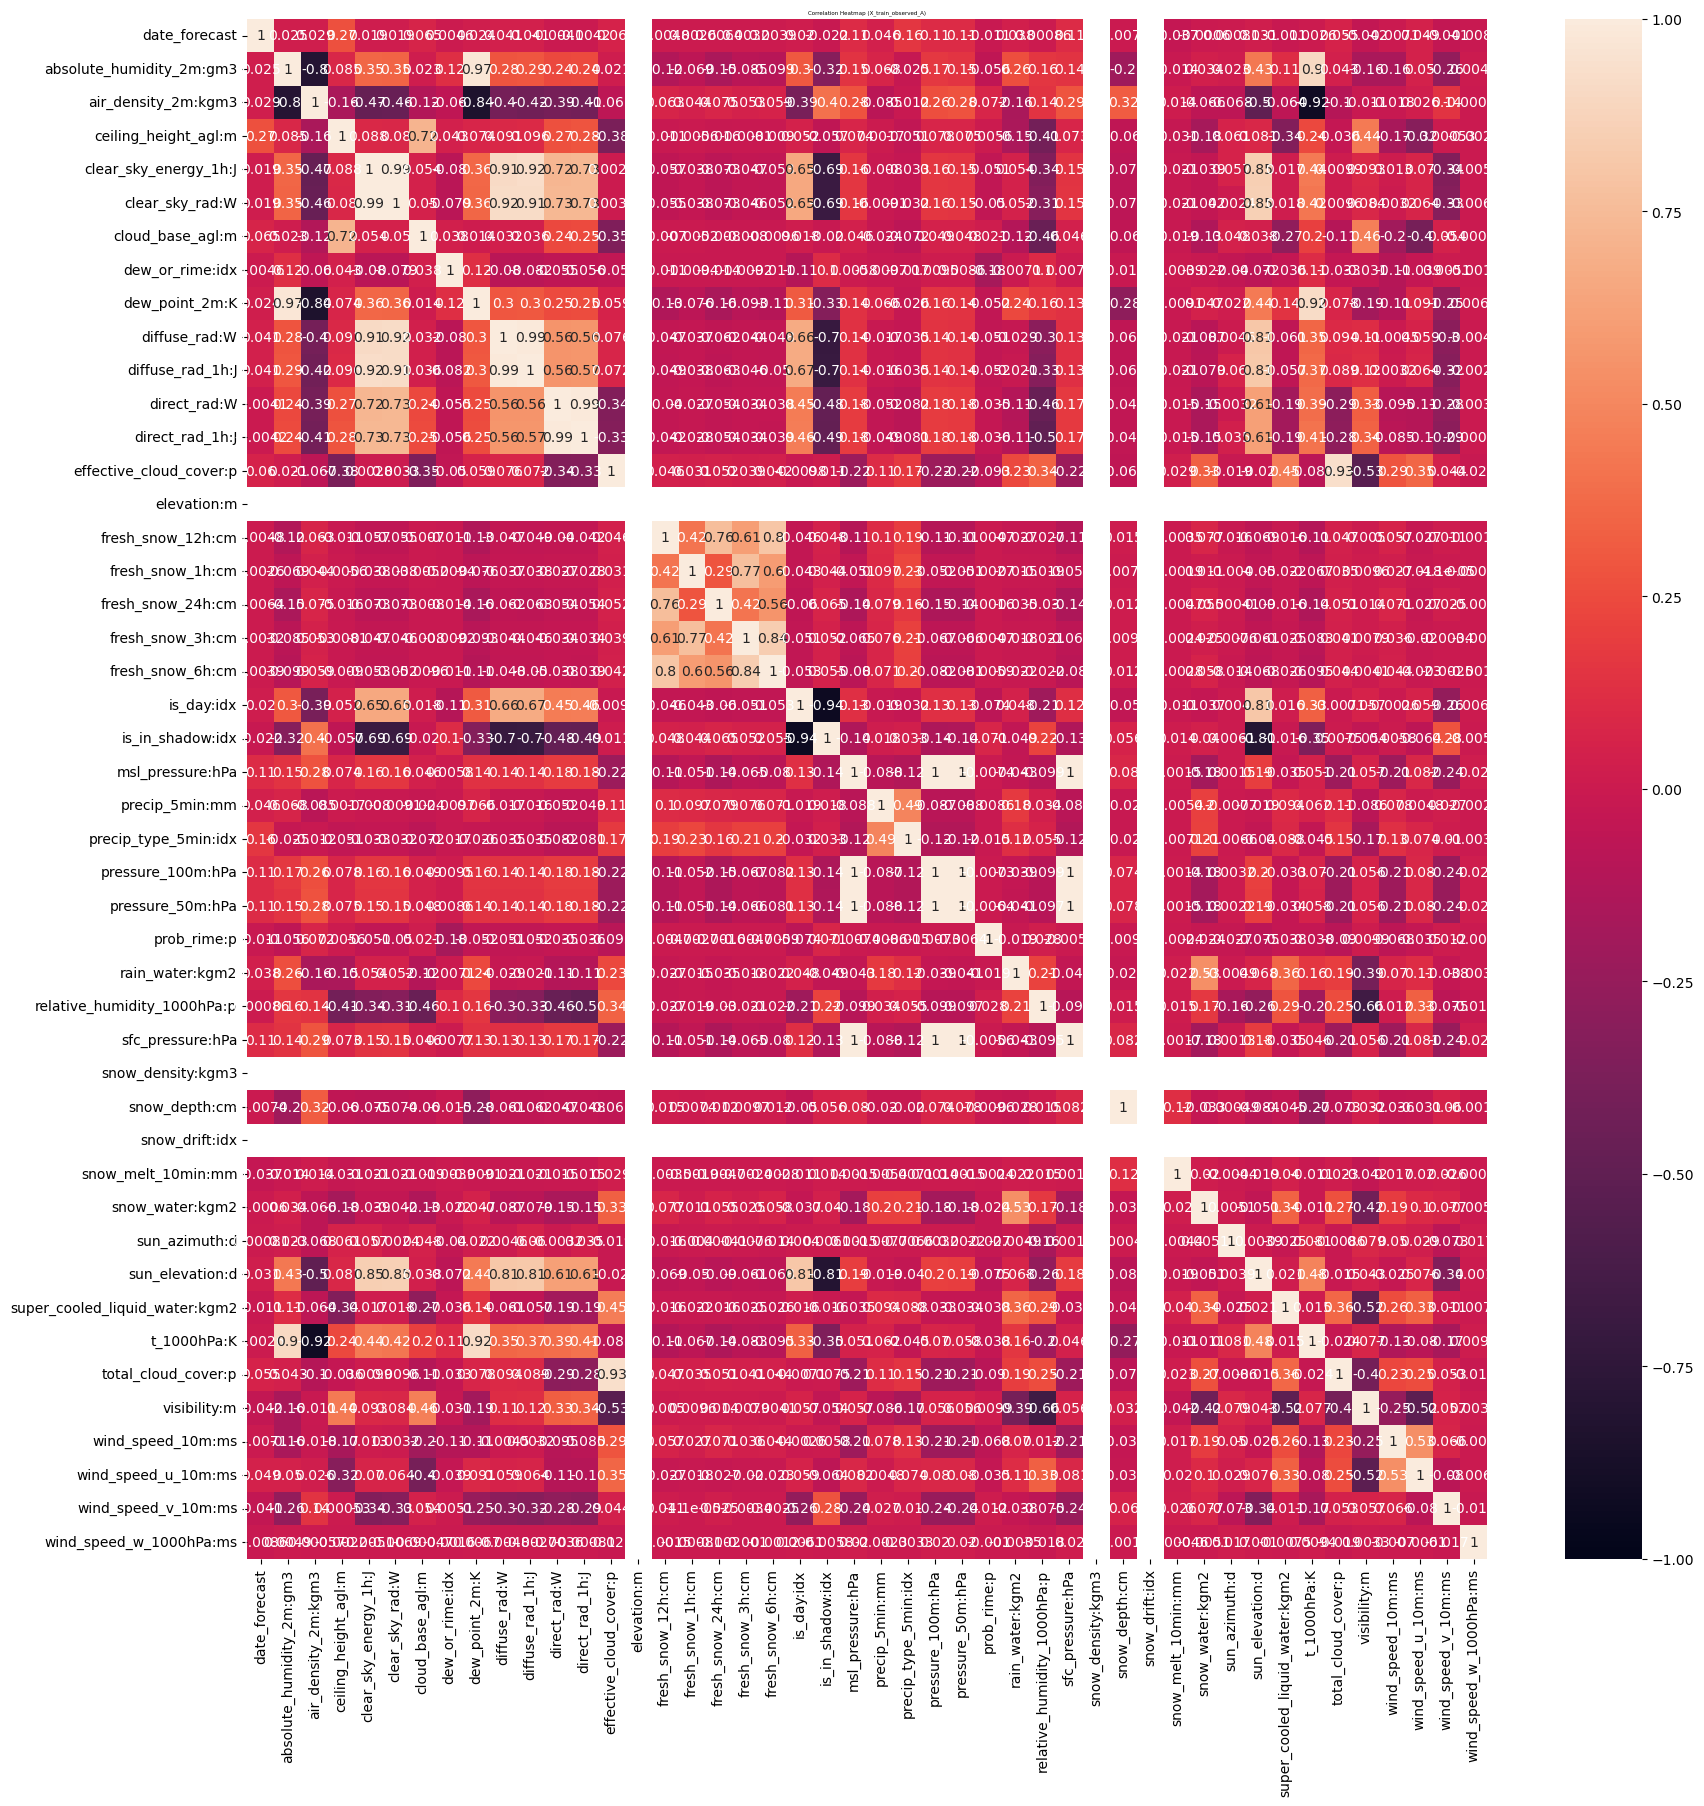

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X_train_observed_A.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (X_train_observed_A)', fontdict={'fontsize':4}, pad=4);


##### 2.4.1.1  Location B

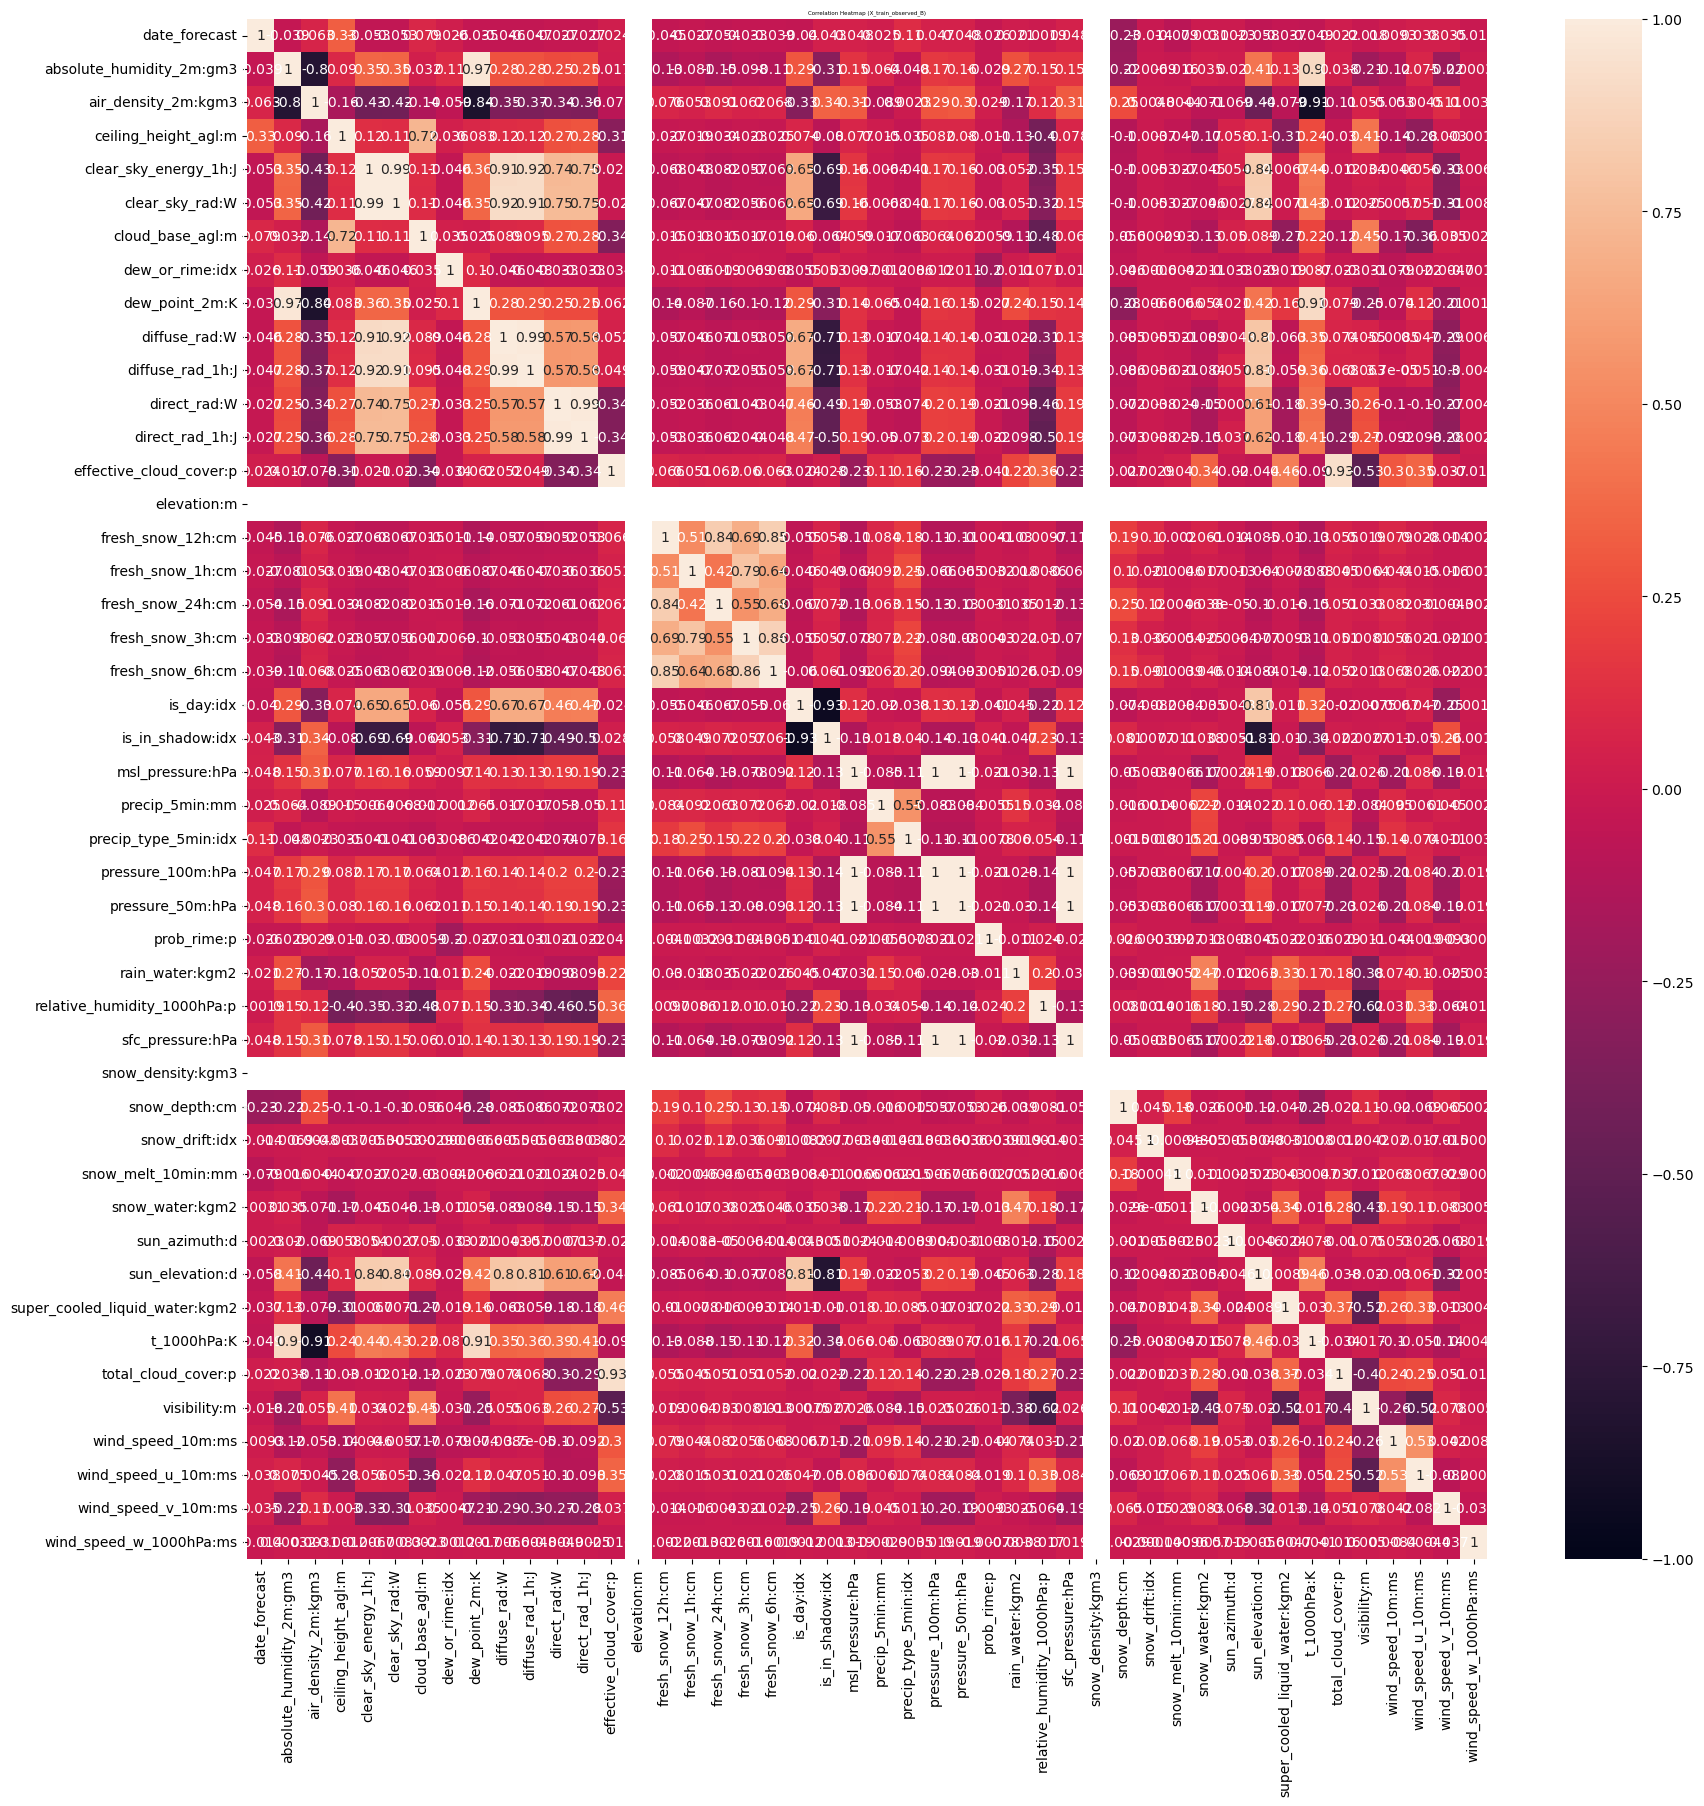

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X_train_observed_B.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (X_train_observed_B)', fontdict={'fontsize':4}, pad=4);

##### 2.4.1.1  Location C

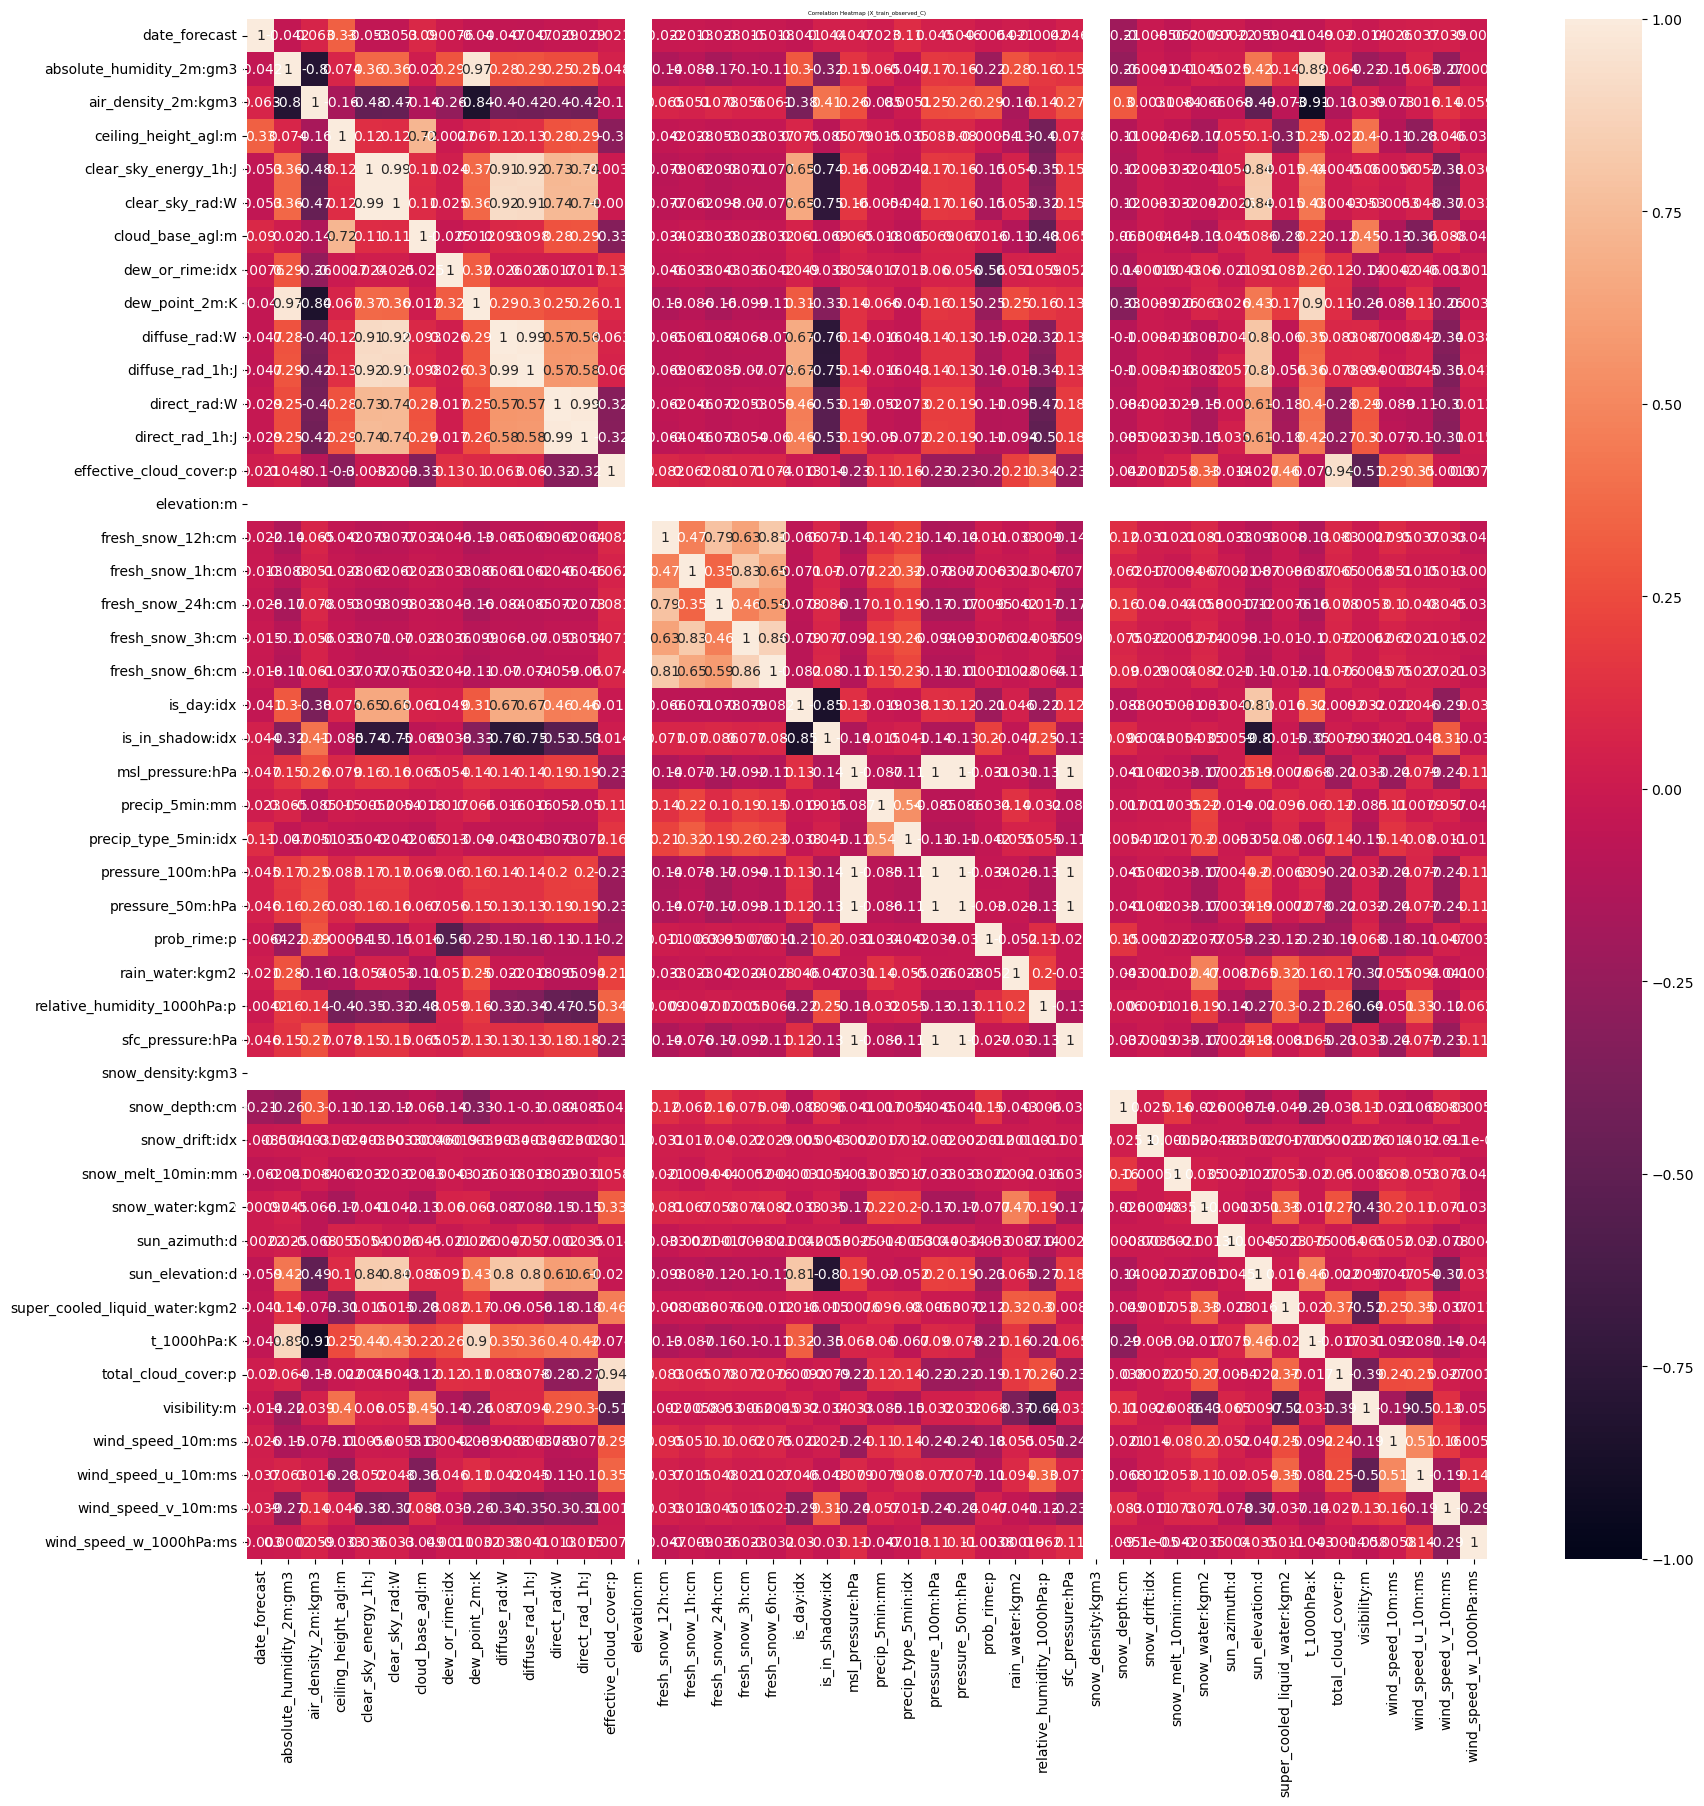

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X_train_observed_C.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap (X_train_observed_C)', fontdict={'fontsize':4}, pad=4);

Let's first load all datasets individually

In [4]:
# A
train_targets_a = pd.read_parquet('../data/A/train_targets.parquet')
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')

# B
train_targets_b = pd.read_parquet('../data/B/train_targets.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')

# C
train_targets_c = pd.read_parquet('../data/C/train_targets.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

No we can look at the each dataset just to see what they look like

Observed training data A

In [5]:
X_train_observed_a.head()

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0 2019-06-02 22:00:00                       7.7                1.230   
1 2019-06-02 22:15:00                       7.7                1.229   
2 2019-06-02 22:30:00                       7.7                1.228   
3 2019-06-02 22:45:00                       7.7                1.226   
4 2019-06-02 23:00:00                       7.7                1.225   

   ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0           1744.900024                    0.0              0.0   
1           1734.000000                    0.0              0.0   
2           1723.500000                    0.0              0.0   
3           1713.400024                    0.0              0.0   
4           1703.599976                    0.0              0.0   

   cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
0       1744.900024              0.0      280.299988            0.0  ...   
1       1734.000000              0.0      280.299988            0.0  ...   
2       1723.500000              0.0      280.299988            0.0  ...   
3       1713.400024              0.0      280.299988            0.0  ...   
4       1703.599976              0.0      280.299988            0.0  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0     342.834015           -3.202                             0.0   
1     346.294006           -3.650                             0.0   
2     349.768005           -3.998                             0.0   
3     353.251007           -4.247                             0.0   
4     356.742004           -4.393                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   285.899994                100.0  39640.101562                3.7   
1   286.100006                100.0  40123.898438                3.6   
2   286.299988                100.0  40628.300781                3.6   
3   286.600006                100.0  41153.601562                3.5   
4   286.799988                100.0  41699.898438                3.5   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                 -3.6                 -0.8                     -0.0  
1                 -3.6                 -0.6                     -0.0  
2                 -3.6                 -0.4                     -0.0  
3                 -3.5                 -0.2                     -0.0  
4                 -3.5                  0.0                     -0.0  

[5 rows x 46 columns]

In [6]:
X_train_observed_a.shape

(118669, 46)

We can see that the A train observed set has 46 features and 118669 rows

Estimated train A

In [7]:
X_train_estimated_a.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2022-10-27 07:00:18 2022-10-28 22:00:00                       8.4   
1 2022-10-27 07:00:18 2022-10-28 22:15:00                       8.4   
2 2022-10-27 07:00:18 2022-10-28 22:30:00                       8.3   
3 2022-10-27 07:00:18 2022-10-28 22:45:00                       8.3   
4 2022-10-27 07:00:18 2022-10-28 23:00:00                       8.2   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.233           1425.099976                    0.0   
1                1.233           2085.899902                    0.0   
2                1.233           2746.600098                    0.0   
3                1.233           3407.399902                    0.0   
4                1.233           4068.199951                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1211.699951              1.0      281.399994  ...   
1              0.0       1560.500000              1.0      281.299988  ...   
2              0.0       1909.400024              1.0      281.200012  ...   
3              0.0       2258.199951              1.0      281.200012  ...   
4              0.0       2607.000000              1.0      281.100006  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0     340.799011       -38.466999                             0.0   
1     345.451996       -38.955002                             0.0   
2     350.153015       -39.310001                             0.0   
3     354.886993       -39.528999                             0.0   
4     359.638000       -39.609001                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   284.700012                100.0  29429.699219                0.8   
1   284.700012                100.0  23604.099609                0.7   
2   284.700012                100.0  17799.800781                0.7   
3   284.600006                100.0  12016.500000                0.6   
4   284.600006                100.0   6254.399902                0.6   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                 -0.4                  0.7                     -0.0  
1                 -0.4                  0.7                     -0.0  
2                 -0.3                  0.6                     -0.0  
3                 -0.2                  0.6                     -0.0  
4                 -0.1                  0.6                     -0.0  

[5 rows x 47 columns]

In [8]:
X_train_estimated_a.shape

(17576, 47)

We can see that the estimated set has one more feature, which is the date_calc coloumn

Test A

In [9]:
X_test_estimated_a.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                       4.4   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.286            912.700012                    0.0   
1                1.287            912.700012                    0.0   
2                1.287            912.700012                    0.0   
3                1.287            912.700012                    0.0   
4                1.287                   NaN                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1041.199951              0.0      271.700012  ...   
1              0.0       1054.800049              0.0      271.700012  ...   
2              0.0       1068.300049              0.0      271.600006  ...   
3              0.0       1081.900024              0.0      271.600006  ...   
4              0.0       1095.400024              0.0      271.600006  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      10.520000          -11.185                             0.0   
1      14.203000          -10.825                             0.0   
2      17.868999          -10.360                             0.0   
3      21.514000           -9.794                             0.0   
4      25.135000           -9.128                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   273.799988            80.699997  30210.699219                4.0   
1   273.799988            77.000000  30003.599609                4.0   
2   273.799988            73.099998  29797.099609                3.9   
3   273.799988            69.000000  29618.599609                3.9   
4   273.799988            64.500000  29507.500000                3.9   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  2.2                  3.4                     -0.0  
1                  2.1                  3.4                     -0.0  
2                  2.1                  3.3                     -0.0  
3                  2.0                  3.3                     -0.0  
4                  2.0                  3.3                     -0.0  

[5 rows x 47 columns]

In [10]:
X_test_estimated_a.shape

(2880, 47)

Train targets A

In [11]:
train_targets_a.head()

time  pv_measurement
0 2019-06-02 22:00:00            0.00
1 2019-06-02 23:00:00            0.00
2 2019-06-03 00:00:00            0.00
3 2019-06-03 01:00:00            0.00
4 2019-06-03 02:00:00           19.36

In [12]:
train_targets_a.shape

(34085, 2)

We can see that the train targets only has two features, the time and day, and the pv_measurement. 

There are two main discoveries here already:

1. The time features are every hour, but the train and test set hav rows for every 15 mins. This means that as a part of the preprocessing stage, we need to resample the data so that we get hours when training. 
2. There are 0 values in the pv_measurement coloumn. This might be because it is during the night, but is there really a reason that there should be 0 production at 1AM and then 19.36 at 2AM? This might indicate that we must look into cleaning some 0 values

Let's look at all location B

Observed train B

In [13]:
X_train_observed_b.head()

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0 2019-01-01 00:00:00                       5.6                1.239   
1 2019-01-01 00:15:00                       5.6                1.239   
2 2019-01-01 00:30:00                       5.5                1.240   
3 2019-01-01 00:45:00                       5.4                1.241   
4 2019-01-01 01:00:00                       5.4                1.241   

   ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0           1226.400024                    0.0              0.0   
1           1209.300049                    0.0              0.0   
2           1192.099976                    0.0              0.0   
3           1174.900024                    0.0              0.0   
4           1157.599976                    0.0              0.0   

   cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
0       1226.400024              0.0      275.399994            0.0  ...   
1       1209.300049              0.0      275.200012            0.0  ...   
2       1192.099976              0.0      275.100006            0.0  ...   
3       1174.900024              0.0      274.899994            0.0  ...   
4       1157.599976              0.0      274.700012            0.0  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      12.985000       -49.139999                             0.0   
1      18.205999       -48.688000                             0.0   
2      23.339001       -48.091000                             0.0   
3      28.367001       -47.358002                             0.0   
4      33.275002       -46.497002                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   278.399994            73.900002  19275.900391                2.5   
1   278.299988            83.800003  17638.000000                2.7   
2   278.200012            91.199997  16008.799805                2.9   
3   278.100006            96.400002  14388.500000                3.1   
4   278.000000            99.400002  12777.299805                3.4   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  1.1                  2.2                     -0.0  
1                  1.2                  2.4                     -0.0  
2                  1.2                  2.7                     -0.0  
3                  1.2                  2.9                     -0.0  
4                  1.3                  3.1                     -0.0  

[5 rows x 46 columns]

In [14]:
X_train_observed_b.shape

(116929, 46)

Estimated train B

In [15]:
X_test_estimated_b.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                       4.3   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.283            912.299988                    0.0   
1                1.283            912.299988                    0.0   
2                1.283            912.299988                    0.0   
3                1.283            912.299988                    0.0   
4                1.283                   NaN                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1039.900024              0.0      271.700012  ...   
1              0.0       1053.099976              0.0      271.700012  ...   
2              0.0       1066.400024              0.0      271.600006  ...   
3              0.0       1079.599976              0.0      271.600006  ...   
4              0.0       1092.900024              0.0      271.600006  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      10.521000          -11.184                             0.0   
1      14.204000          -10.824                             0.0   
2      17.870001          -10.360                             0.0   
3      21.514000           -9.793                             0.0   
4      25.135000           -9.127                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   273.799988            80.699997  31329.500000                4.0   
1   273.799988            77.099998  31181.599609                4.0   
2   273.799988            73.199997  31033.599609                3.9   
3   273.799988            69.000000  30885.699219                3.9   
4   273.799988            64.599998  30737.800781                3.9   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  2.2                  3.4                     -0.0  
1                  2.1                  3.4                     -0.0  
2                  2.1                  3.4                     -0.0  
3                  2.0                  3.3                     -0.0  
4                  2.0                  3.3                     -0.0  

[5 rows x 47 columns]

In [16]:
X_test_estimated_b.shape

(2880, 47)

Test B

In [17]:
X_test_estimated_b.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                       4.3   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.283            912.299988                    0.0   
1                1.283            912.299988                    0.0   
2                1.283            912.299988                    0.0   
3                1.283            912.299988                    0.0   
4                1.283                   NaN                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1039.900024              0.0      271.700012  ...   
1              0.0       1053.099976              0.0      271.700012  ...   
2              0.0       1066.400024              0.0      271.600006  ...   
3              0.0       1079.599976              0.0      271.600006  ...   
4              0.0       1092.900024              0.0      271.600006  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      10.521000          -11.184                             0.0   
1      14.204000          -10.824                             0.0   
2      17.870001          -10.360                             0.0   
3      21.514000           -9.793                             0.0   
4      25.135000           -9.127                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   273.799988            80.699997  31329.500000                4.0   
1   273.799988            77.099998  31181.599609                4.0   
2   273.799988            73.199997  31033.599609                3.9   
3   273.799988            69.000000  30885.699219                3.9   
4   273.799988            64.599998  30737.800781                3.9   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  2.2                  3.4                     -0.0  
1                  2.1                  3.4                     -0.0  
2                  2.1                  3.4                     -0.0  
3                  2.0                  3.3                     -0.0  
4                  2.0                  3.3                     -0.0  

[5 rows x 47 columns]

In [18]:
X_test_estimated_b.shape

(2880, 47)

Train targets B

In [19]:
train_targets_b.head()

time  pv_measurement
0 2018-12-31 23:00:00             0.0
1 2019-01-01 00:00:00             0.0
2 2019-01-01 01:00:00             0.0
3 2019-01-01 02:00:00             0.0
4 2019-01-01 03:00:00             0.0

In [20]:
train_targets_b.shape

(32848, 2)

Lets look at C

Observed train C

In [21]:
X_train_observed_c.head()

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0 2019-01-01 00:00:00                       5.6                1.240   
1 2019-01-01 00:15:00                       5.5                1.241   
2 2019-01-01 00:30:00                       5.4                1.241   
3 2019-01-01 00:45:00                       5.4                1.241   
4 2019-01-01 01:00:00                       5.3                1.241   

   ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0           1153.599976                    0.0              0.0   
1           1137.900024                    0.0              0.0   
2           1122.199951                    0.0              0.0   
3           1106.400024                    0.0              0.0   
4           1090.599976                    0.0              0.0   

   cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
0       1153.599976              1.0      275.200012            0.0  ...   
1       1137.900024              1.0      275.100006            0.0  ...   
2       1122.199951              1.0      274.899994            0.0  ...   
3       1106.400024              1.0      274.700012            0.0  ...   
4       1090.599976              1.0      274.500000            0.0  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      12.989000       -49.178001                             0.0   
1      18.214001       -48.724998                             0.0   
2      23.351000       -48.127998                             0.0   
3      28.382000       -47.393002                             0.0   
4      33.292999       -46.529999                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   278.500000            68.500000  18220.400391                2.5   
1   278.399994            80.800003  17083.699219                2.8   
2   278.299988            89.900002  15940.900391                3.0   
3   278.200012            96.099998  14792.000000                3.3   
4   278.100006            99.400002  13637.299805                3.5   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  1.1                  2.2                     -0.0  
1                  1.1                  2.5                     -0.0  
2                  1.1                  2.8                     -0.0  
3                  1.2                  3.0                     -0.0  
4                  1.2                  3.3                     -0.0  

[5 rows x 46 columns]

In [22]:
X_train_observed_c.shape

(116825, 46)

Estimated train C

In [23]:
X_train_estimated_c.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2022-10-27 07:00:18 2022-10-28 22:00:00                       8.3   
1 2022-10-27 07:00:18 2022-10-28 22:15:00                       8.3   
2 2022-10-27 07:00:18 2022-10-28 22:30:00                       8.3   
3 2022-10-27 07:00:18 2022-10-28 22:45:00                       8.2   
4 2022-10-27 07:00:18 2022-10-28 23:00:00                       8.2   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.231           1427.400024                    0.0   
1                1.231           2089.000000                    0.0   
2                1.231           2750.500000                    0.0   
3                1.230           3412.100098                    0.0   
4                1.230           4073.699951                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1215.800049              1.0      281.200012  ...   
1              0.0       1425.900024              1.0      281.200012  ...   
2              0.0       1636.099976              1.0      281.100006  ...   
3              0.0       1846.199951              1.0      281.100006  ...   
4              0.0       2056.399902              1.0      281.100006  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0     340.785004       -38.502998                             0.0   
1     345.440002       -38.992001                             0.0   
2     350.144012       -39.348000                             0.0   
3     354.880005       -39.567001                             0.0   
4     359.634003       -39.647999                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   285.200012                100.0  34387.398438                1.2   
1   285.100006                100.0  27418.500000                1.2   
2   285.100006                100.0  20508.800781                1.2   
3   285.000000                100.0  13657.799805                1.2   
4   285.000000                100.0   6865.000000                1.2   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                 -0.3                  1.1                     -0.0  
1                 -0.2                  1.2                     -0.0  
2                 -0.1                  1.2                     -0.0  
3                 -0.0                  1.2                     -0.0  
4                  0.1                  1.2                     -0.0  

[5 rows x 47 columns]

In [24]:
X_train_estimated_c.shape

(17576, 47)

Test C

In [25]:
X_test_estimated_c.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                       4.2   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                       4.2   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                       4.1   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                       4.1   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                       4.1   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.286                   NaN                    0.0   
1                1.286                   NaN                    0.0   
2                1.286                   NaN                    0.0   
3                1.286                   NaN                    0.0   
4                1.286                   NaN                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
0              0.0       1178.000000              0.0      271.100006  ...   
1              0.0       1217.000000              0.0      271.100006  ...   
2              0.0       1256.000000              0.0      271.000000  ...   
3              0.0       1295.000000              0.0      270.899994  ...   
4              0.0       1334.099976              0.0      270.899994  ...   

   sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
0      10.519000          -11.223                             0.0   
1      14.202000          -10.862                             0.0   
2      17.868000          -10.397                             0.0   
3      21.513000           -9.830                             0.0   
4      25.134001           -9.163                             0.0   

   t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
0   273.700012            73.699997  31411.000000                3.5   
1   273.700012            70.800003  31295.800781                3.4   
2   273.700012            67.900002  31178.599609                3.4   
3   273.700012            64.800003  31082.500000                3.4   
4   273.700012            61.599998  31051.400391                3.4   

   wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
0                  1.5                  3.1                     -0.0  
1                  1.5                  3.1                     -0.0  
2                  1.4                  3.1                     -0.0  
3                  1.4                  3.1                     -0.0  
4                  1.4                  3.1                     -0.0  

[5 rows x 47 columns]

In [26]:
X_test_estimated_c.shape

(2880, 47)

Train targets C

In [27]:
train_targets_c.head()

time  pv_measurement
0 2018-12-31 23:00:00             NaN
1 2019-01-01 00:00:00             NaN
2 2019-01-01 01:00:00             NaN
3 2019-01-01 02:00:00             NaN
4 2019-01-01 03:00:00             NaN

In [28]:
train_targets_c.shape

(32155, 2)

We can see that B and C have the same number of features and data structure as A. However there is a new key discovery:

 - The train targets in C contains NaN values. They should probably be cleaned, or perhaps filled with something else. 

#### 2.2.2 - Train targets EDA

Let's do some investigation at the train targets for A, B and C respectively.

Plotting train targets A

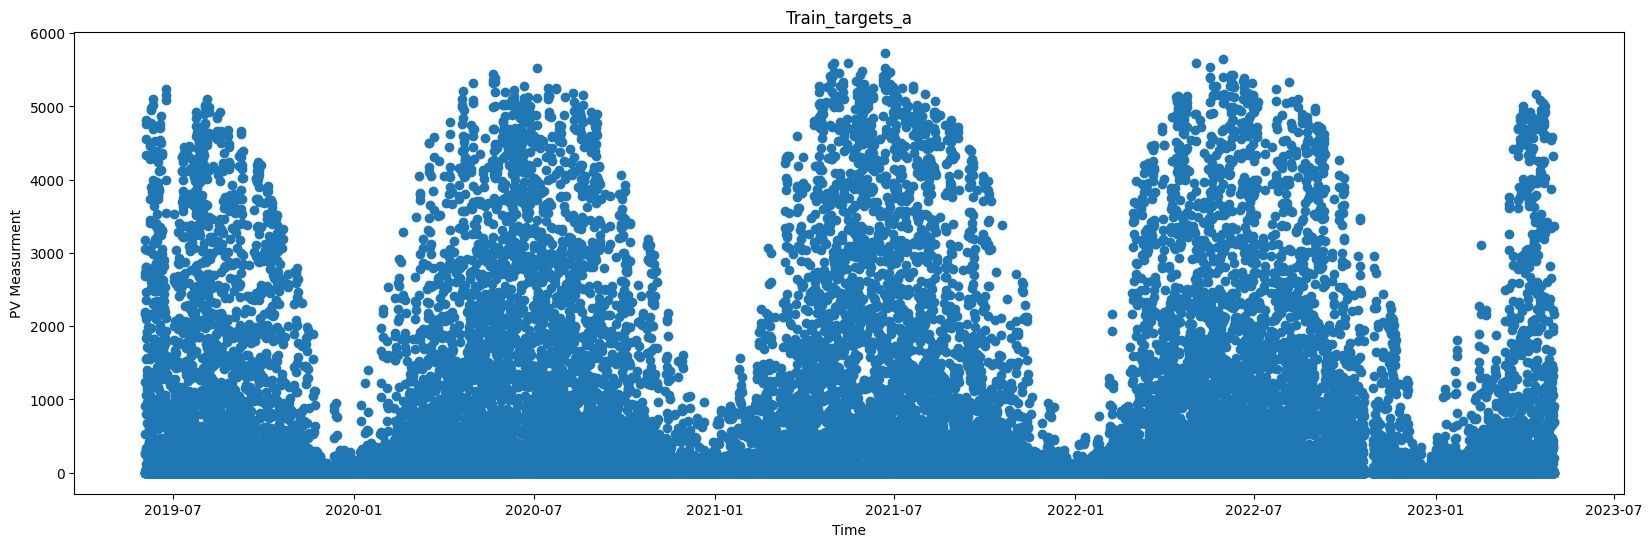

In [29]:
#plotting train_targets_a
plt.figure(figsize=(20,6))
plt.scatter(train_targets_a["time"], train_targets_a["pv_measurement"])
plt.xlabel("Time")
plt.ylabel("PV Measurment")
plt.title("Train_targets_a")
plt.show()

We can see a general trend of lower measurements around January (the winter). Possibly due to snow, or just lower radiation and less production during the winter. 

It's har to see smaller trends, so let's look at some smaller scales for A

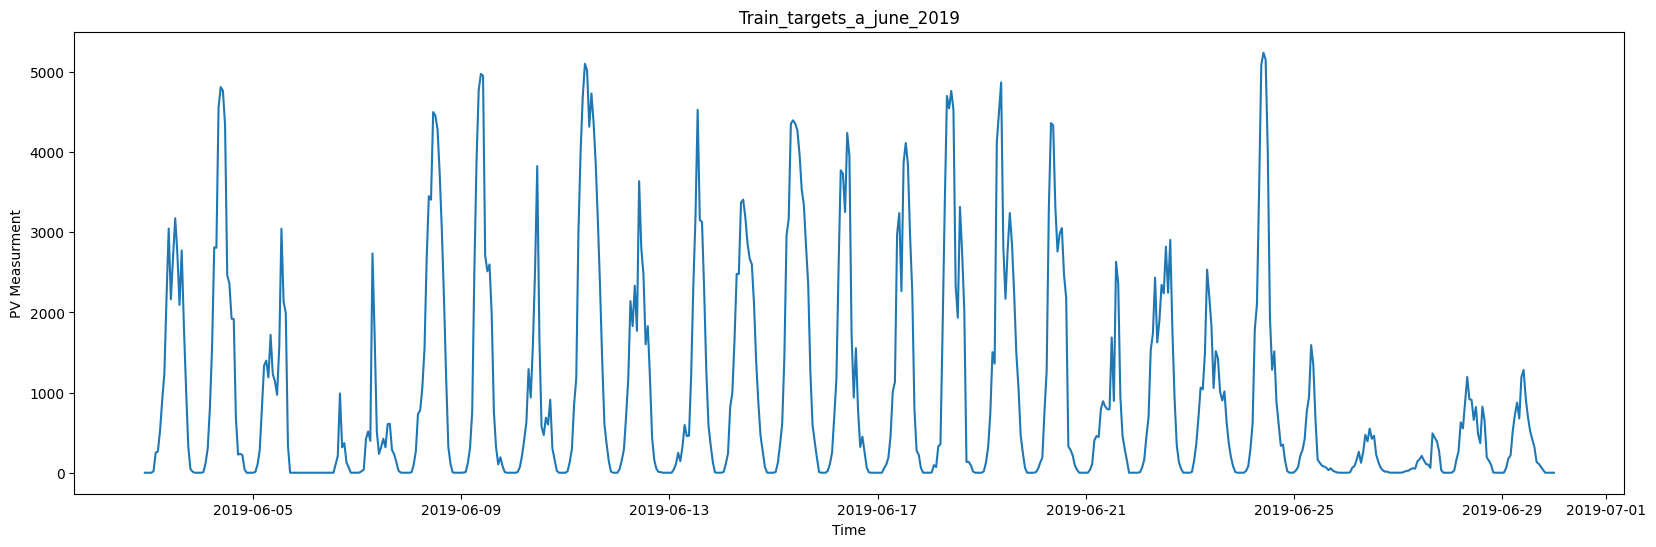

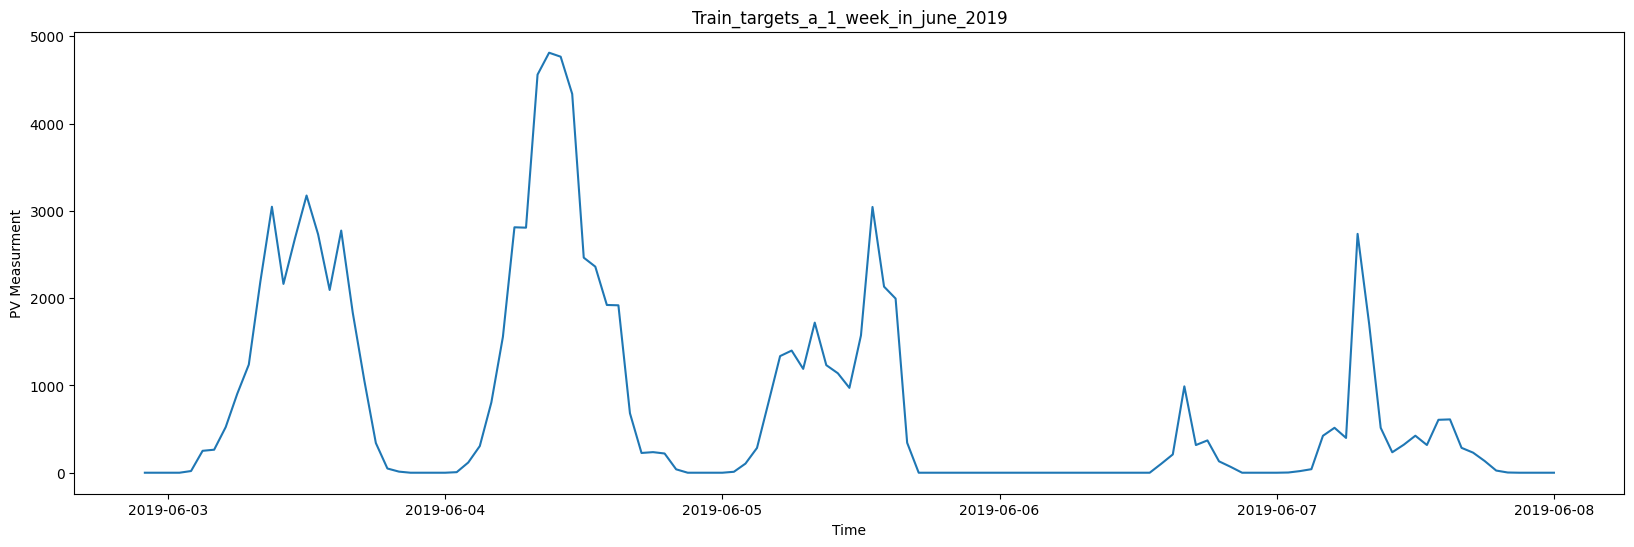

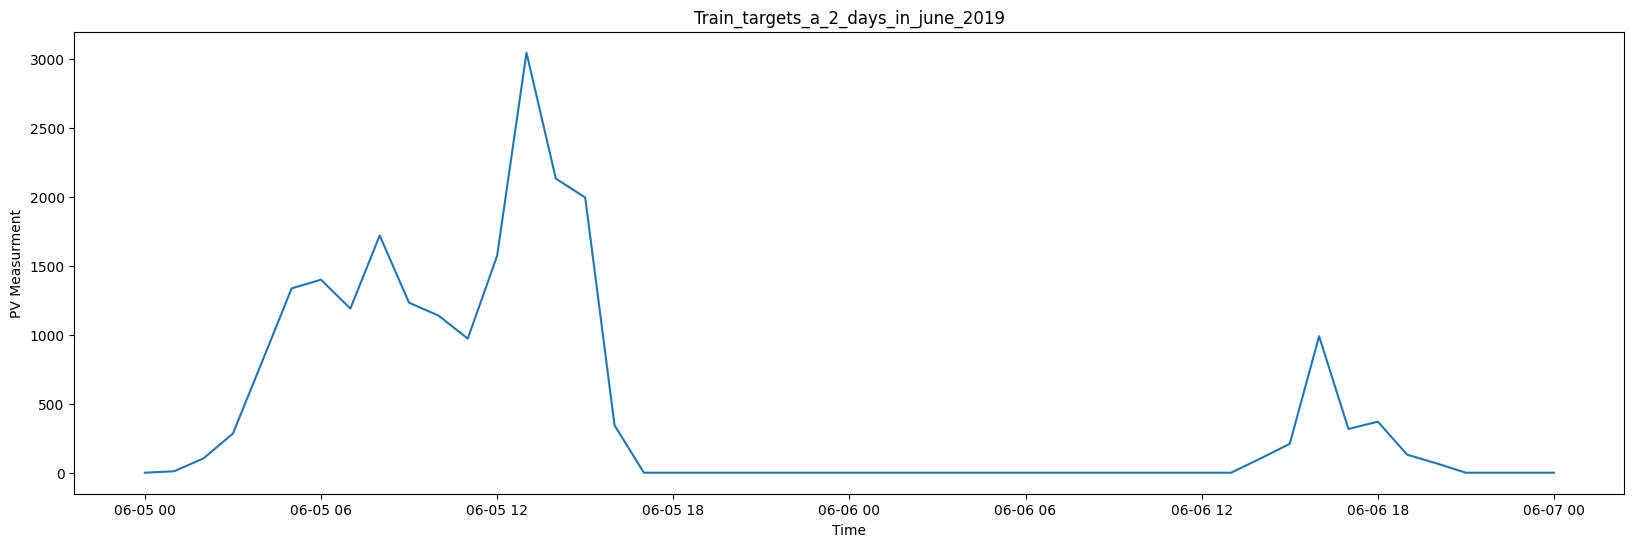

In [30]:
#plotting A targets for a month, week, and two days

for day in ["30", "08", "07"]:
    if day!="07":
        start_date = pd.Timestamp('2019-06-01')
        end_date = pd.Timestamp('2019-06-'+day)
        filtered_train_targets_a = train_targets_a[(train_targets_a['time'] >= start_date) & (train_targets_a['time'] <= end_date)]
        plt.figure(figsize=(20, 6))
        plt.plot(filtered_train_targets_a["time"], filtered_train_targets_a["pv_measurement"])
        plt.xlabel("Time")
        plt.ylabel("PV Measurment")
        if day=="30":
            plt.title("Train_targets_a_june_2019")
            plt.show()
        else:
            plt.title("Train_targets_a_1_week_in_june_2019")
            plt.show()
    else:
        start_date = pd.Timestamp('2019-06-05')
        end_date = pd.Timestamp('2019-06-'+day)
        filtered_train_targets_a = train_targets_a[(train_targets_a['time'] >= start_date) & (train_targets_a['time'] <= end_date)]
        plt.figure(figsize=(20, 6))
        plt.plot(filtered_train_targets_a["time"], filtered_train_targets_a["pv_measurement"])
        plt.xlabel("Time")
        plt.ylabel("PV Measurment")
        plt.title("Train_targets_a_2_days_in_june_2019")
        plt.show()

We can see from this plot that on a monthly scale the pv_measurements move up and down and seem to have a general pattern where there are 0 measurements and where there are peaks. 

Zooming in on a week and a day, we can see that there seems to be some irregularities. For example, why does the 6'th have som many repeating 0 measurements. Is there a reason that there on a summer day in June at 12 o'clock should be 0 production when the day before had a lot of production at 12? It indicate that there are some errors in the measurements, where repeated valeus over a long period of time has to be cleaned. 

Let's look at B and C

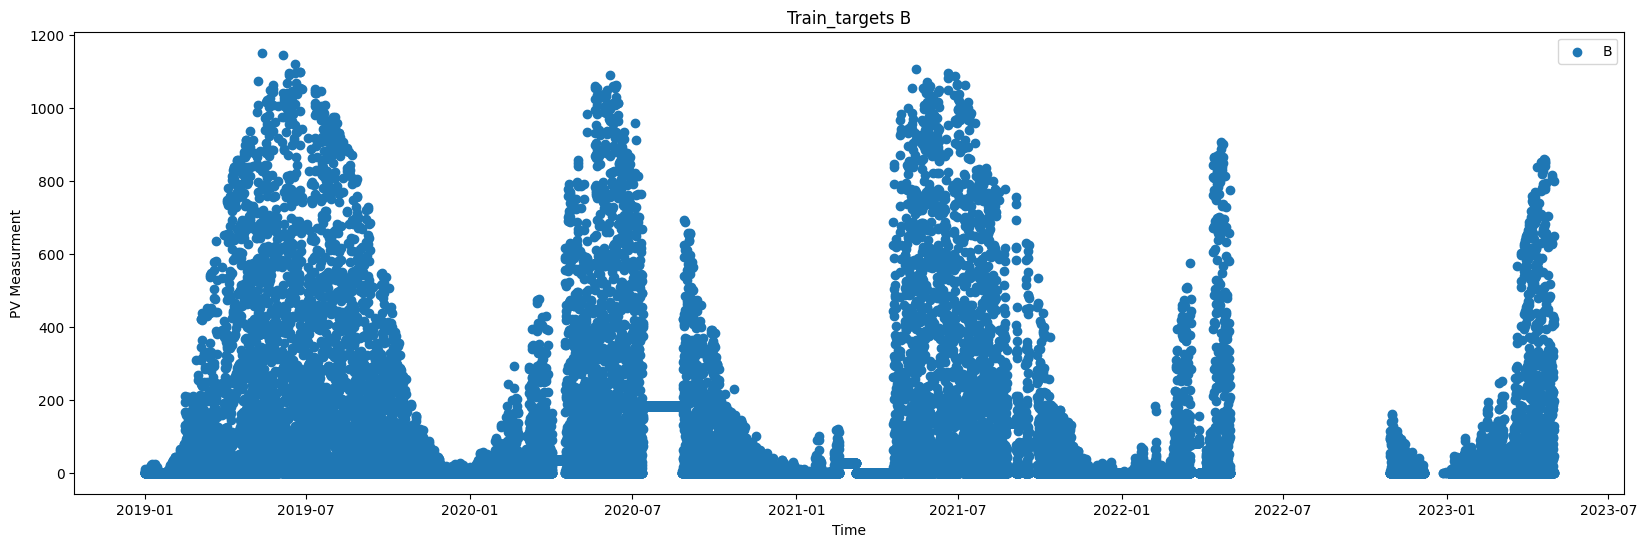

In [31]:
#B
plt.figure(figsize=(20,6))
plt.scatter(train_targets_b["time"], train_targets_b["pv_measurement"], label="B")
plt.legend()
plt.xlabel("Time")
plt.ylabel("PV Measurment")
plt.title("Train_targets B")
plt.show()

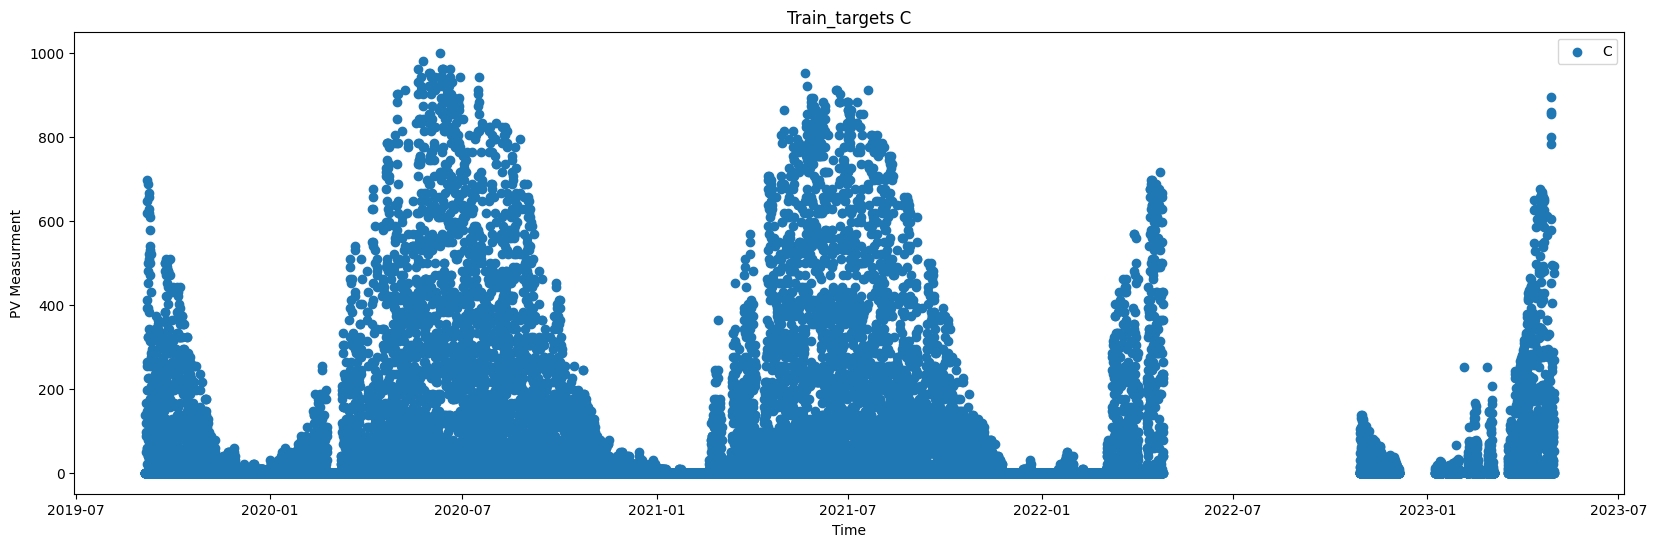

In [32]:
#C
plt.figure(figsize=(20,6))
plt.scatter(train_targets_c["time"], train_targets_c["pv_measurement"], label="C")
plt.legend()
plt.xlabel("Time")
plt.ylabel("PV Measurment")
plt.title("Train_targets C")
plt.show()

We can see that there are some key discoveries for B and C

1. In B there are two huge gaps of non-zero repeating values, these needs to be cleaned for sure
2. There is a huge time gap with no data towards the end

Let's plot all train targets on top of eachother

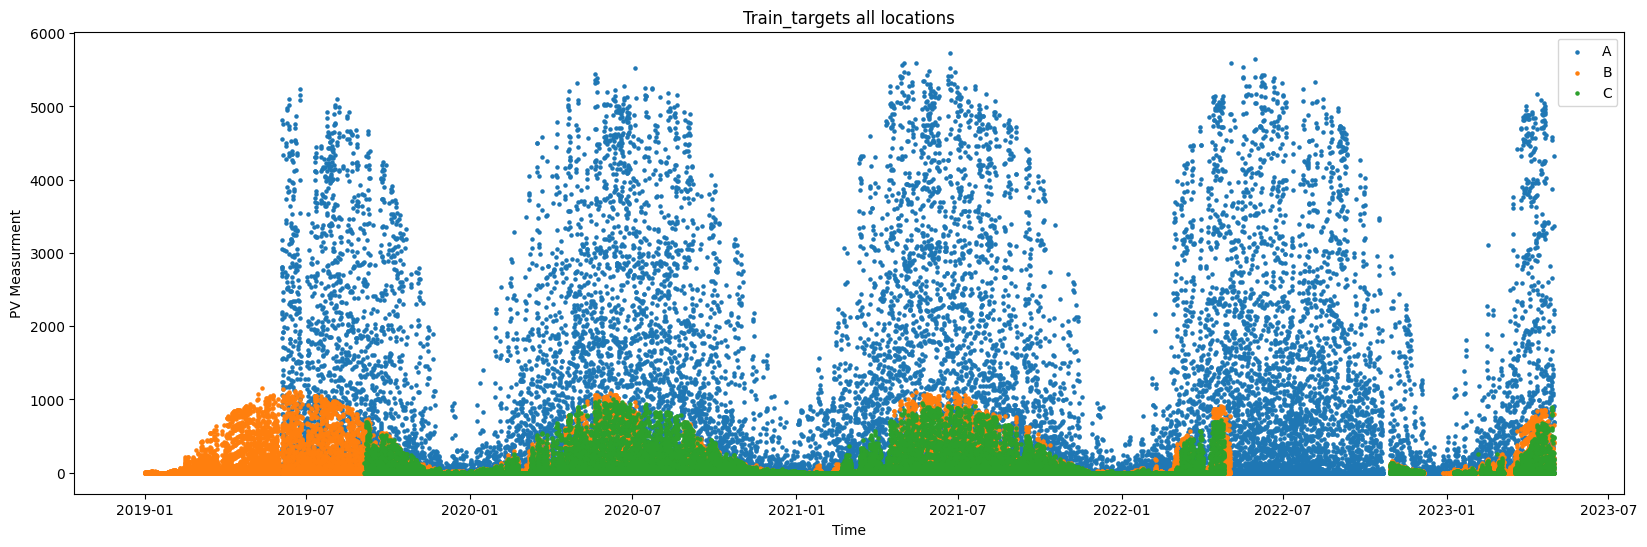

In [33]:
#plotting all train targets up against eachother
plt.figure(figsize=(20,6))
plt.scatter(train_targets_a["time"], train_targets_a["pv_measurement"], label="A",s=5)
plt.scatter(train_targets_b["time"], train_targets_b["pv_measurement"], label="B",s=5)
plt.scatter(train_targets_c["time"], train_targets_c["pv_measurement"], label="C",s=5)
plt.legend()
plt.xlabel("Time")
plt.ylabel("PV Measurment")
plt.title("Train_targets all locations")
plt.show()


We can se that the pv_measurements are a lot higher for location A, while B and see seems to have about the same scale on their measurement. 

Let's look at the number of zeros and number of NaN values in each of the locations

In [38]:
#counting the number of rows, and zero-measurement rows in traintargets_a
train_targets_a_0_pvs = train_targets_a[train_targets_a["pv_measurement"] == 0]
count_targett_pvs_0 = len(train_targets_a_0_pvs)
print("Number of rows in train_targets_a with 0 measurments: ", count_targett_pvs_0)

# NaN in A
train_target_a_Nan_pvs = train_targets_a[pd.isna(train_targets_a["pv_measurement"])]
count_target_nan_a = len(train_target_a_Nan_pvs)
print("Number of rows in train_targets_a with NaN measurments: ", count_target_nan_a)

#B
train_targets_b_0_pvs = train_targets_b[train_targets_b["pv_measurement"] == 0]
train_targets_b_negative_pvs = train_targets_b[train_targets_b["pv_measurement"] < 0]
train_target_b_Nan_pvs = train_targets_b[pd.isna(train_targets_b["pv_measurement"])]
count_targett_pvs_0_b = len(train_targets_b_0_pvs)
count_target_negative_b = len(train_targets_b_negative_pvs)
count_target_nan_b = len(train_target_b_Nan_pvs)
print("Number of rows in train_targets_b with 0 measurments: ", count_targett_pvs_0_b)
print("Number of rows in train_targets_b with negative measurments: ", count_target_negative_b)
print("Number of rows in train_targets_b with NaN measurments: ", count_target_nan_b)


#C

train_targets_c_0_pvs = train_targets_c[train_targets_c["pv_measurement"] == 0]
train_targets_c_negative_pvs = train_targets_c[train_targets_c["pv_measurement"] < 0]
train_target_c_Nan_pvs = train_targets_c[pd.isna(train_targets_c["pv_measurement"])]
count_targett_pvs_0_c = len(train_targets_c_0_pvs)
count_target_negative_c = len(train_targets_c_negative_pvs)
count_target_nan_c = len(train_target_c_Nan_pvs)
print("Number of rows in train_targets_c with 0 measurments: ", count_targett_pvs_0_c)
print("Number of rows in train_targets_c with negative measurments: ", count_target_negative_c)
print("Number of rows in train_targets_c with NaN measurments: ", count_target_nan_c)

Number of rows in train_targets_a with 0 measurments:  16040
Number of rows in train_targets_a with NaN measurments:  0
Number of rows in train_targets_b with 0 measurments:  17312
Number of rows in train_targets_b with negative measurments:  0
Number of rows in train_targets_b with NaN measurments:  4
Number of rows in train_targets_c with 0 measurments:  15952
Number of rows in train_targets_c with negative measurments:  0
Number of rows in train_targets_c with NaN measurments:  6060


There are 2 key takeaways from this:

1. There seems to be more or less equal amounts of 0 values in all locations, and that they are not uncommon. 
2. While A has no NaN values and B have only 4, C have 6060 which is a huge amount. This is probably therefore a error that needs to be cleaned away

Next, wee need to see if there are some negative values. There should not be negative values, as it is impossible to produce negative energy

In [39]:
#counting the number of negative rows
train_targets_a_negative_pvs = train_targets_a[train_targets_a["pv_measurement"] < 0]
count_target_negative_a = len(train_targets_a_negative_pvs)
print("Number of rows in train_targets_a with negative measurments: ", count_target_negative_a)


train_targets_b_negative_pvs = train_targets_b[train_targets_b["pv_measurement"] < 0]
count_target_negative_b = len(train_targets_b_negative_pvs)
print("Number of rows in train_targets_b with negative measurments: ", count_target_negative_b)

#counting the number of negative rows
train_targets_c_negative_pvs = train_targets_c[train_targets_c["pv_measurement"] < 0]
count_target_negative_c = len(train_targets_c_negative_pvs)
print("Number of rows in train_targets_c with negative measurments: ", count_target_negative_c)

Number of rows in train_targets_a with negative measurments:  0
Number of rows in train_targets_b with negative measurments:  0
Number of rows in train_targets_c with negative measurments:  0


There are no negative values, which is good!

## 2.4 – Feature Exploration

## 2.5 – Aggregations

# 3 - Preprocessing

### 3.1 - Dataset loading

In [ ]:
# Load data

y_data = {}
y_test_data = pd.read_csv(f"../data/test.csv")
X_test_estimated_data = {}
X_train_estimated_data = {}
X_train_observed_data = {}
locations = ["A", "B", "C"]

for location in locations:
    y_data[location] = pd.read_parquet(f"../data/{location}/train_targets.parquet")

    X_test_estimated_data[location] = pd.read_parquet(
        f"../data/{location}/X_test_estimated.parquet"
    )
    X_train_estimated_data[location] = pd.read_parquet(
        f"../data/{location}/X_train_estimated.parquet"
    )
    X_train_observed_data[location] = pd.read_parquet(
        f"../data/{location}/X_train_observed.parquet"
    )

In [ ]:
# Combine data

combine_data = (
    lambda data: pd.concat(data.values(), keys=data.keys())
    .reset_index()
    .drop(columns="level_1")
    .rename(columns={"level_0": "location"})
)

y = combine_data(y_data).sort_values(by=["time", "location"])

y_test_data = y_test_data.rename(columns={"prediction": "pv_measurement"})
y_test_data = y_test_data[["time", "location", "pv_measurement"]]

# Add Kaggle test data to y
y = pd.concat([y, y_test_data]).sort_values(by=["time", "location"])
y["time"] = pd.to_datetime(y["time"])

X_train_observed = combine_data(X_train_observed_data).assign(data_type="observed")
X_train_estimated = combine_data(X_train_estimated_data).assign(data_type="estimated")
X_test_estimated = combine_data(X_test_estimated_data).assign(data_type="test")

X = pd.concat([X_train_observed, X_train_estimated, X_test_estimated]).sort_values(
    by=["date_forecast", "location"]
)

print("X shape:", X.shape)
print("y shape:", y.shape)

C:\Users\krist\AppData\Local\Temp\ipykernel_6096\3349527316.py:16: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  y = pd.concat([y, y_test_data]).sort_values(by=["time", "location"])


X shape: (413791, 49)
y shape: (101248, 3)


### 3.2 - Data cleaning

#### 3.2.1 - Resample data to hourly granularity

In [ ]:
# Custom aggregation function
def custom_resample(aggregation_dict): 
    result = {}
    for column in X.columns:
        if column in ["date_forecast"]:
            continue

        aggregation = aggregation_dict.get(column, 'mean')  # Use 'mean' by default

        result[column] = aggregation
    return result

# Specify the aggregation method for specific columns
aggregation_dict = {
    "location": "first",
    "data_type": "first",

    # Categorical weather features
    "is_day:idx": "first",
    "is_in_shadow:idx": "first",
    "precip_type_5min:idx": "first",
    "dew_or_rime:idx": "first",
    "snow_drift:idx": "first",
}

X = (
    X.set_index("date_forecast")
    .groupby("location")
    .resample("H")
    .apply(custom_resample(aggregation_dict))
    .drop(columns=["location"])
    .reset_index()
    .sort_values(by=["date_forecast", "location"])
    .reset_index(drop=True)
)


#### 3.2.2 - Remove NaN rows

In [ ]:
# Find all rows that only contain NaN in X

nan_rows = X[X.drop(columns=["date_forecast", "location"]).isna().all(axis=1)].index

X = X.drop(nan_rows).reset_index(drop=True)
display(X.describe())

# Find all rows that only contain NaN in y

nan_rows = y[y.drop(columns=["time", "location"]).isna().all(axis=1)].index

y = y.drop(nan_rows).reset_index(drop=True)
display(y.describe())

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count             103450.000000        103450.000000          85710.000000   
mean                   6.022451             1.255468           2818.218750   
std                    2.766890             0.037343           2490.028320   
min                    0.500000             1.139250             27.600000   
25%                    4.000000             1.230000           1063.206177   
50%                    5.450000             1.255000           1847.675049   
75%                    7.900000             1.279000           3831.431152   
max                   18.700001             1.441000          12294.901367   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           1.034500e+05    103450.000000      95988.000000   
mean            5.340856e+05       148.357071       1728.615723   
std             8.361419e+05       232.916977       1777.659424   
min             0.000000e+00         0.000000         27.299997   
25%             0.000000e+00         0.000000        602.687500   
50%             1.444562e+04         2.350000       1170.074951   
75%             8.463045e+05       233.250000       2085.399902   
max             2.990596e+06       835.650024      11673.724609   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  ...  \
count    103450.000000   103450.000000  103450.000000      1.034500e+05  ...   
mean          0.002707      275.193604      40.692169      1.464918e+05  ...   
std           0.254843        7.007302      61.684486      2.194368e+05  ...   
min          -1.000000      247.425003       0.000000      0.000000e+00  ...   
25%           0.000000      270.600006       0.000000      0.000000e+00  ...   
50%           0.000000      275.000000       1.400000      1.314446e+04  ...   
75%           0.000000      280.649994      68.193748      2.444780e+05  ...   
max           1.000000      294.924988     334.750000      1.198315e+06  ...   

       sun_azimuth:d  sun_elevation:d  super_cooled_liquid_water:kgm2  \
count  103450.000000    103450.000000                   103450.000000   
mean      179.593079        -0.686007                        0.056825   
std        97.451599        24.151138                        0.105932   
min         6.983000       -49.931999                        0.000000   
25%        94.335381       -17.985250                        0.000000   
50%       180.008751        -0.422625                        0.000000   
75%       264.694176        16.086188                        0.100000   
max       348.487518        49.943748                        1.375000   

         t_1000hPa:K  total_cloud_cover:p   visibility:m  wind_speed_10m:ms  \
count  103450.000000        103450.000000  103450.000000      103450.000000   
mean      279.437866            73.615753   33047.601562           3.017211   
std         6.689621            34.070358   17768.091797           1.743118   
min       258.024994             0.000000     132.375000           0.025000   
25%       274.799988            52.900002   17214.430664           1.675000   
50%       278.700012            93.025002   36858.449219           2.675000   
75%       284.093758            99.925003   48121.931641           4.025000   
max       303.250000           100.000000   75489.328125          13.275000   

       wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  
count        103450.000000        103450.000000            103450.000000  
mean              0.677701             0.670877                 0.000048  
std               2.773536             1.871685                 0.006387  
min              -7.225000            -8.400000                -0.100000  
25%              -1.325000            -0.600000                 0.000000  
50%               0.325000             0.700000                 0.000000  
75%               2.500000             1.850000                 0.000000  
max      

pv_measurement
count    95184.000000
mean       280.506347
std        758.866540
min          0.000000
25%          0.000000
50%          0.000000
75%        161.287500
max       5733.420000

#### 3.2.3 - Remove outliers

In [ ]:
# Remove repeated values

def find_repeated_indexes(df, column_name, repeat_count=12, ignore_zeros=True) -> list:
    """
    Find and return the indexes of rows with a specified number of repeated values in a given column.

    Parameters:
    - df: DataFrame to search for repeated rows.
    - column_name: Name of the column to check for repeated values.
    - repeat_count: Number of repeated values required to consider a row as a match.

    Returns:
    - List of indexes for rows with the specified number of repeated values in the given column.
    """
    repeated_indexes = []
    temp_repeated_indexes = []
    current_value = None

    for index, row in df.iterrows():
        value = row[column_name]

        if value == 0 and ignore_zeros:
            continue

        if value == current_value:
            temp_repeated_indexes.append(index)
        else:
            current_value = value
            if len(temp_repeated_indexes) <= repeat_count:
                temp_repeated_indexes.clear()
            else:
                repeated_indexes.extend(
                    set(temp_repeated_indexes) - set(repeated_indexes)
                )
                temp_repeated_indexes.clear()

    return repeated_indexes

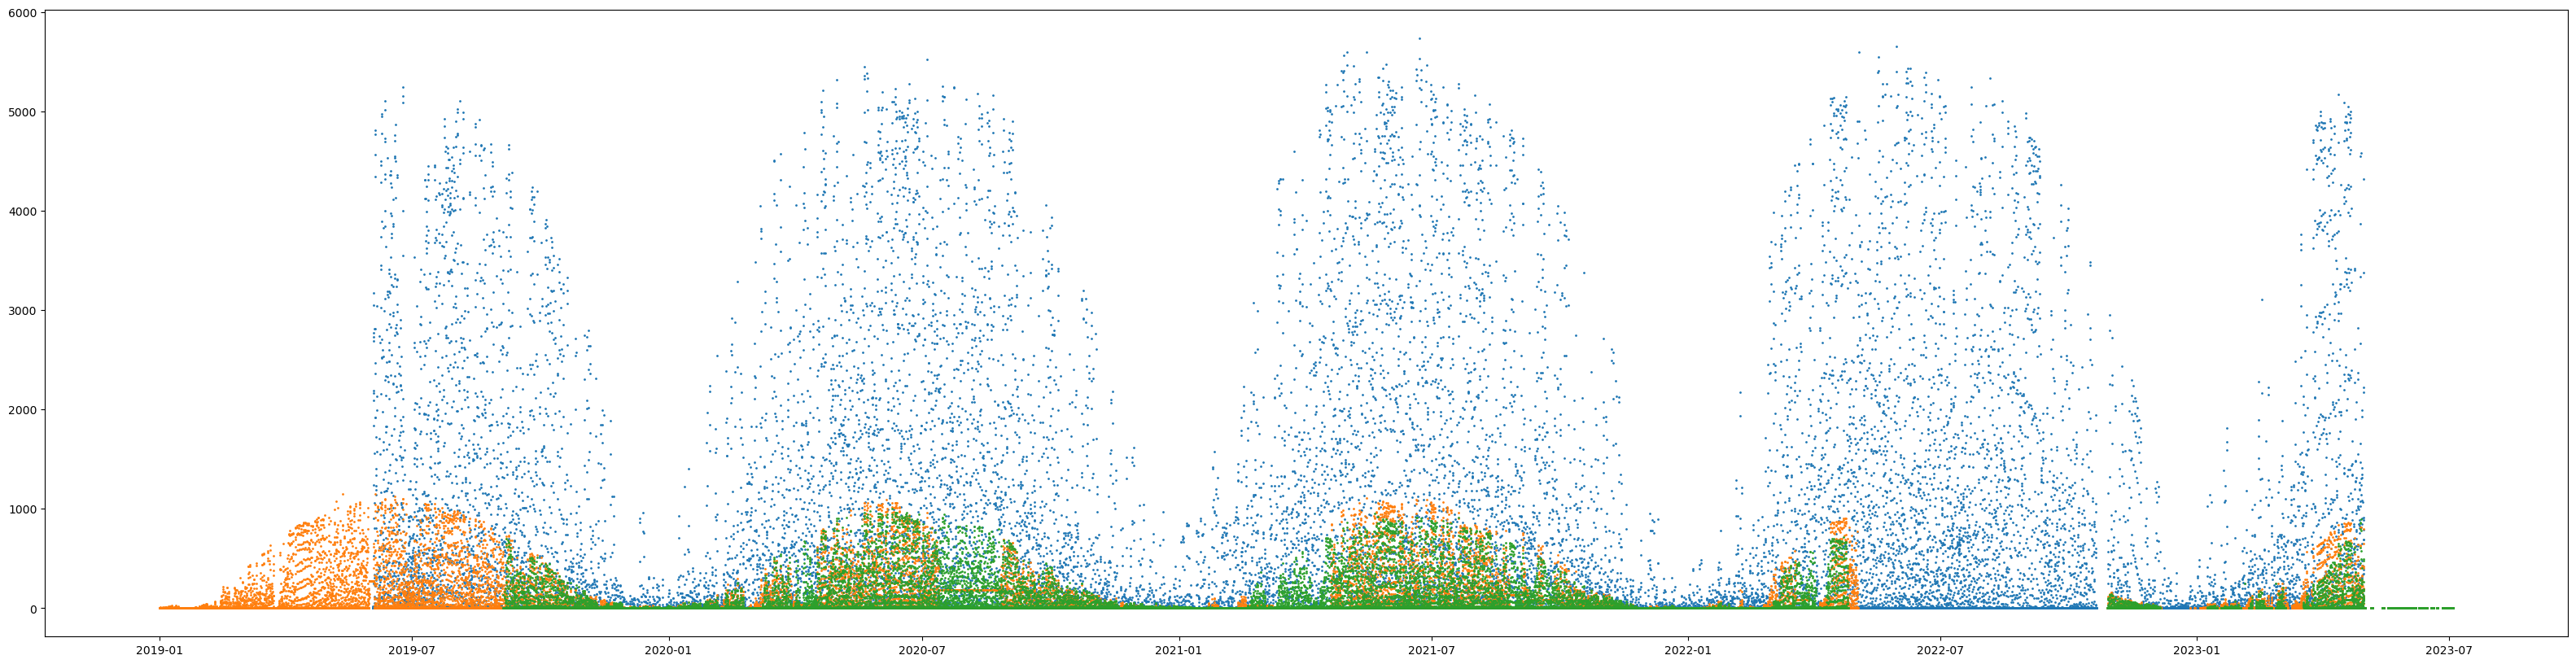

In [ ]:
# Visulize data per location
plt.figure(figsize=(40, 10))

for location in locations:
    plt.scatter(y[y.location == location].time, y[y.location == location]["pv_measurement"], s=1)

### 3.3 - Combine X and y

#### 3.3.1 Create standard preprocessing data

In [ ]:
# Remove repeated values (Version 1)

# Create a copy of X and y
X_standard = X.copy()
y_standard = y.copy()

for location in locations:
    # Drop rows with repeated values over 24 hours
    repeated_indexes = find_repeated_indexes(
        y_standard[y_standard.location == location].sort_values(by=["location", "time"]),
        "pv_measurement",
        repeat_count=24,
        ignore_zeros=True,
    )

    y_standard = y_standard.drop(repeated_indexes).reset_index(drop=True)

    # Drop rows with repeated zeros over 4 days,
    # ignore dates after '2023-05-01 00:00:00' as they are test data

    repeated_indexes = find_repeated_indexes(
        y_standard[(y_standard.location == location) & (y_standard.time <= "2023-05-01 00:00:00")].sort_values(
            by=["location", "time"]
        ),
        "pv_measurement",
        repeat_count=72,
        ignore_zeros=False,
    )

    y_standard = y_standard.drop(repeated_indexes).reset_index(drop=True)

In [ ]:
# Combine X and y on date_forecast and location. Drop rows where a row does not exist in both X and y.

data_standard = pd.merge(
    X_standard, y_standard, left_on=["date_forecast", "location"], right_on=["time", "location"]
).drop(columns=["time"])

#### 3.3.2 Create simple preprocessing data 

In [ ]:
# Remove repeated values (Version 2)

# Create a copy of X and y
X_simple = X.copy()
y_simple = y.copy()

for location in locations:
    # Drop rows with repeated values over 24 hours
    repeated_indexes = find_repeated_indexes(
        y_simple[y_simple.location == location].sort_values(by=["location", "time"]),
        "pv_measurement",
        repeat_count=48,
        ignore_zeros=True,
    )

    y_simple = y_simple.drop(repeated_indexes).reset_index(drop=True)

In [ ]:
# Combine X and y on date_forecast and location. Drop rows where a row does not exist in both X and y.

data_simple = pd.merge(
    X_simple, y_simple, left_on=["date_forecast", "location"], right_on=["time", "location"]
).drop(columns=["time"])

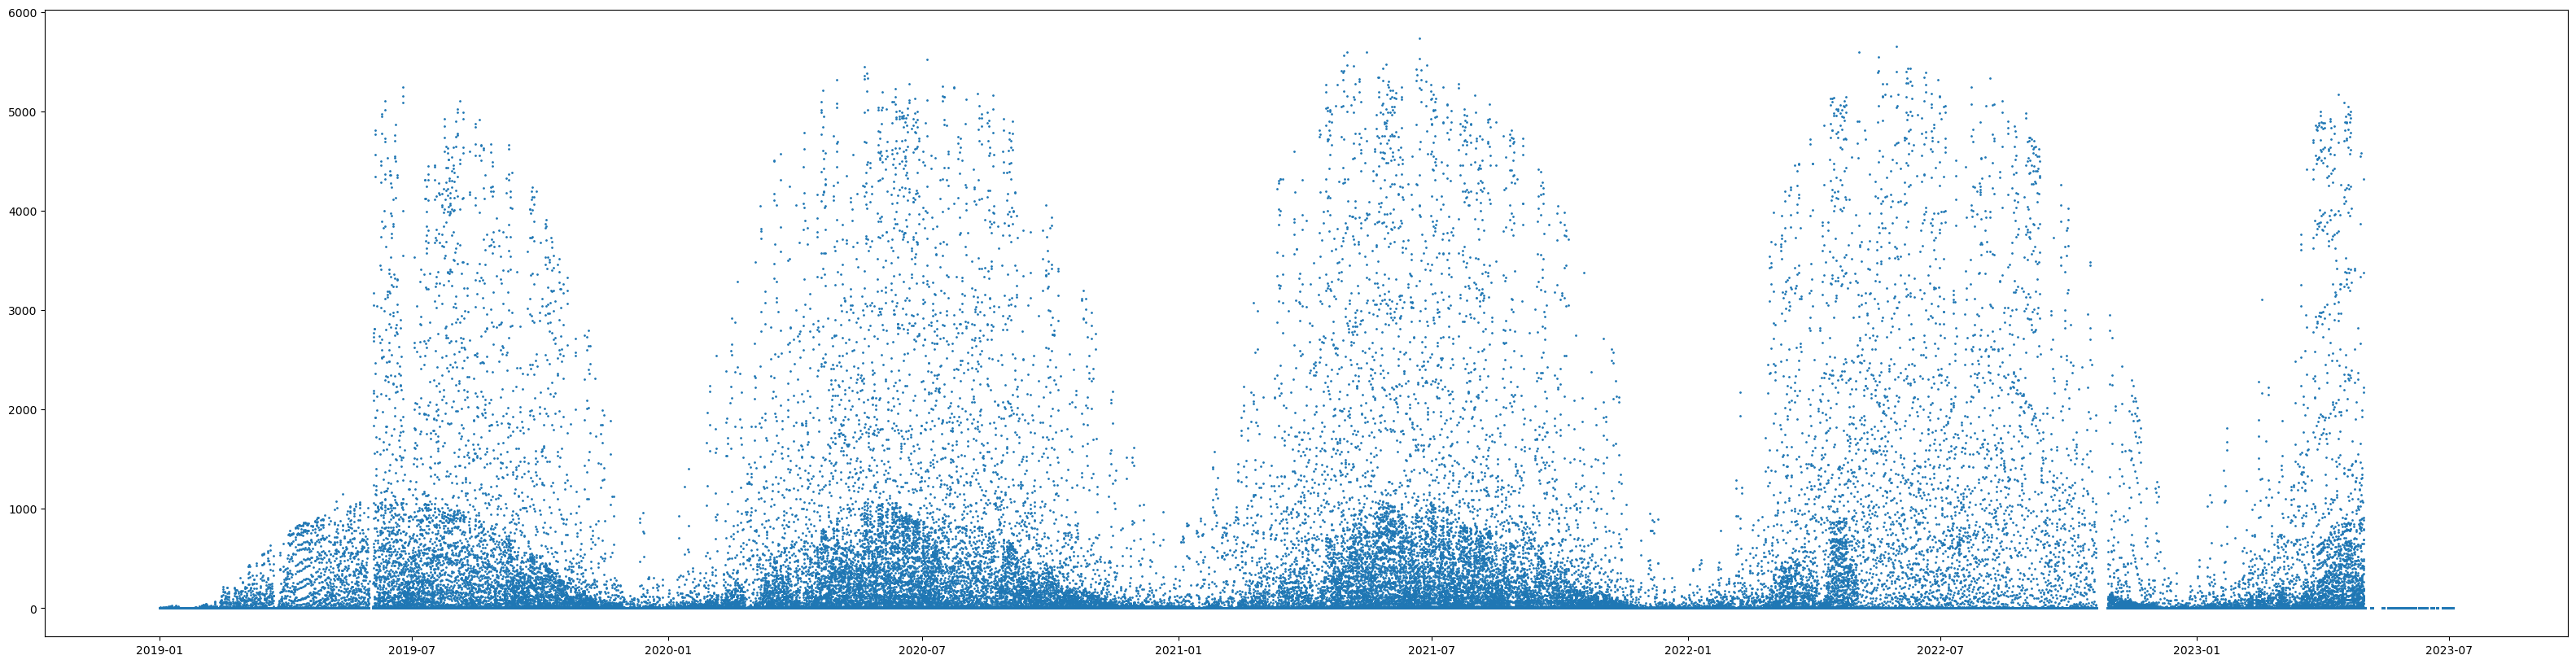

In [ ]:
plt.figure(figsize=(40, 10))
plt.scatter(data_simple.date_forecast, data_simple["pv_measurement"], s=1)

### 3.4 - Feature Engineering

#### 3.4.1 - Add sinus and cosinus features

In [ ]:
# Function that sinus and cosinus transform a column

def add_sin_cos(df, column_name, period):
    """
    Add sinus and cosinus transformed columns for the given column.

    Parameters:
    - df: DataFrame to add the transformed columns to.
    - column_name: Name of the column to transform.
    - period: Period of the sinus and cosinus functions.
    """
    df[f"{column_name}_sin"] = np.sin(2 * np.pi * df[column_name] / period)
    df[f"{column_name}_cos"] = np.cos(2 * np.pi * df[column_name] / period)


In [ ]:
# Add sinus and cosinus transformed columns for time for data_standard

data_standard["hour"] = data_standard["date_forecast"].dt.hour
data_standard["month"] = data_standard["date_forecast"].dt.month

add_sin_cos(data_standard, "hour", 23)
add_sin_cos(data_standard, "month", 12)

In [ ]:
# Add sinus and cosinus transformed columns for time for data_simple

data_simple["hour"] = data_simple["date_forecast"].dt.hour
data_simple["month"] = data_simple["date_forecast"].dt.month

add_sin_cos(data_simple, "hour", 23)
add_sin_cos(data_simple, "month", 12)

#### 3.4.2 - Transform sun_azimuth feature

In [ ]:
# Sun azimuth feature engineering

def convert_from_degree_to_ciruclar(df, feature):
    """
    Converts a feature from degree to circular
    """
    df[feature + "_sin"] = np.sin(np.radians(df[feature]))
    df[feature + "_cos"] = np.cos(np.radians(df[feature]))

    return df

In [ ]:
# Convert sun_azimuth from degree to circular for data_standard
data_standard = convert_from_degree_to_ciruclar(data_standard, "sun_azimuth:d")

In [ ]:
# Convert sun_azimuth from degree to circular for data_standard
data_simple = convert_from_degree_to_ciruclar(data_simple, "sun_azimuth:d")

### 3.5 - Result

In [ ]:
# The two datasets used are data_standard and data_simple

In [ ]:
data_standard.describe().T.drop(columns=["std", "25%", "50%", "75%"])

count           mean         min  \
absolute_humidity_2m:gm3        85205.0       6.214849    0.700000   
air_density_2m:kgm3             85205.0       1.252912    1.139250   
ceiling_height_agl:m            69963.0    2903.989258   27.849998   
clear_sky_energy_1h:J           85205.0  553656.875000    0.000000   
clear_sky_rad:W                 85205.0     153.780457    0.000000   
cloud_base_agl:m                78892.0    1748.616577   27.500000   
dew_or_rime:idx                 85205.0       0.015879   -1.000000   
dew_point_2m:K                  85205.0     275.824036  251.050003   
diffuse_rad:W                   85205.0      41.908321    0.000000   
diffuse_rad_1h:J                85205.0  150879.968750    0.000000   
direct_rad:W                    85205.0      54.301579    0.000000   
direct_rad_1h:J                 85205.0  195499.156250    0.000000   
effective_cloud_cover:p         85205.0      66.873695    0.000000   
elevation:m                     85205.0      11.100123    6.000000   
fresh_snow_12h:cm               85205.0       0.092189    0.000000   
fresh_snow_1h:cm                85205.0       0.007650    0.000000   
fresh_snow_24h:cm               85205.0       0.182312    0.000000   
fresh_snow_3h:cm                85205.0       0.022987    0.000000   
fresh_snow_6h:cm                85205.0       0.046025    0.000000   
is_day:idx                      85205.0       0.502330    0.000000   
is_in_shadow:idx                85205.0       0.545203    0.000000   
msl_pressure:hPa                85205.0    1009.967468  944.400024   
precip_5min:mm                  85205.0       0.005691    0.000000   
precip_type_5min:idx            85205.0       0.076944    0.000000   
pressure_100m:hPa               85205.0     996.340759  932.299988   
pressure_50m:hPa                85205.0    1002.460632  938.049988   
prob_rime:p                     85205.0       0.591769    0.000000   
rain_water:kgm2                 85205.0       0.009961    0.000000   
relative_humidity_1000hPa:p     85205.0      73.533554   19.575001   
sfc_pressure:hPa                85205.0    1008.607544  943.849976   
snow_density:kgm3                2512.0     250.000000  250.000000   
snow_depth:cm                   85205.0       0.114916    0.000000   
snow_drift:idx                  85205.0       0.000023    0.000000   
snow_melt_10min:mm              85205.0       0.000208    0.000000   
snow_water:kgm2                 85205.0       0.088535    0.000000   
sun_azimuth:d                   85205.0     179.642044    6.983000   
sun_elevation:d                 85205.0       0.068016  -49.921501   
super_cooled_liquid_water:kgm2  85205.0       0.057439    0.000000   
t_1000hPa:K                     85205.0     279.956207  259.000000   
total_cloud_cover:p             85205.0      73.569359    0.000000   
visibility:m                    85205.0   32871.074219  159.675003   
wind_speed_10m:ms               85205.0       3.026494    0.025000   
wind_speed_u_10m:ms             85205.0       0.676903   -7.225000   
wind_speed_v_10m:ms             85205.0       0.620215   -8.400000   
wind_speed_w_1000hPa:ms         85205.0       0.000042   -0.100000   
pv_measurement                  85205.0     308.626345    0.000000   
hour                            85205.0      11.502740    0.000000   
month                           85205.0       6.404307    1.000000   
hour_sin                        85205.0      -0.000119   -0.997669   
hour_cos                        85205.0       0.040000   -0.990686   
month_sin                       85205.0       0.031021   -1.000000   
month_cos                       85205.0       0.009230   -1.000000   
sun_azimuth:d_sin               85205.0       0.012768   -1.000000   
sun_azimuth:d_cos               85205.0      -0.062041   -1.000000   

                                         max  
absolute_humidity_2m:gm3        1.735000e+01  
air_density_2m:kgm3             1.426250e+00  
ceiling_height_agl:m            1.229490e+

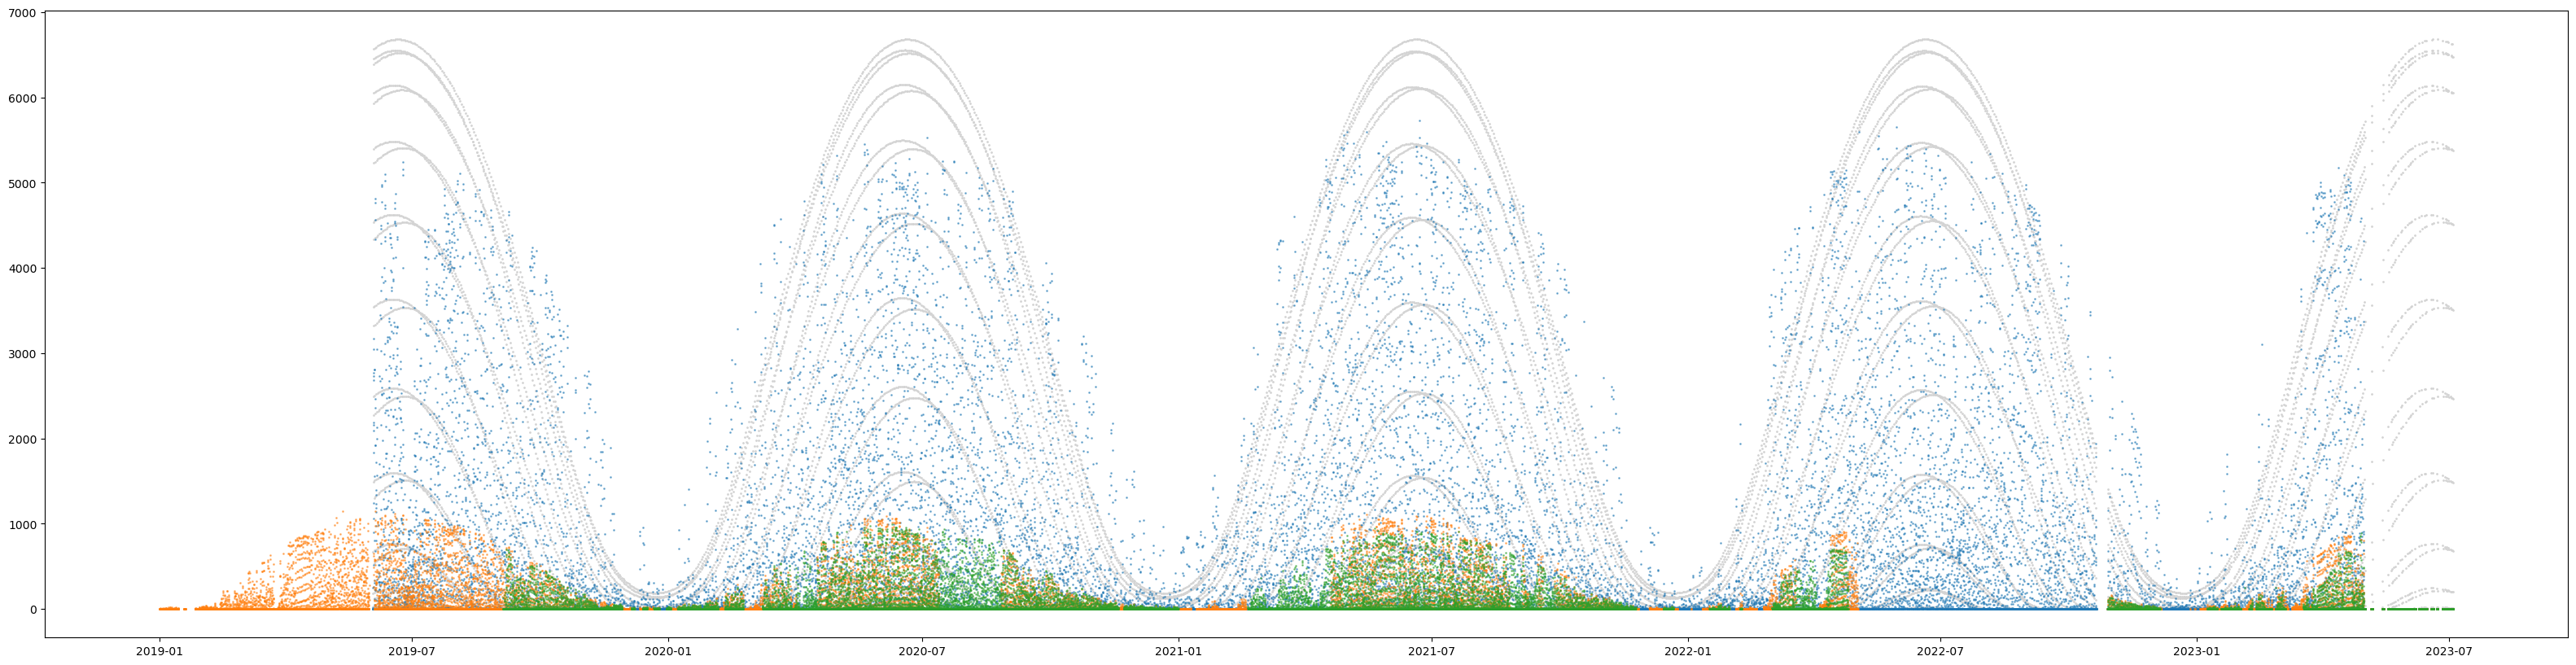

In [ ]:
# Plot alignment and values
plt.figure(figsize=(40, 10))

plt.scatter(
    data_standard[data_standard.location == "A"].date_forecast,
    data_standard[data_standard.location == "A"]["clear_sky_rad:W"] * 8,
    s=1,
    color="lightgrey",
)

for loc in locations:
    plt.scatter(
        data_standard[data_standard.location == loc].date_forecast,
        data_standard[data_standard.location == loc]["pv_measurement"],
        s=1,
        alpha=0.5,
    )

In [ ]:
data_simple.describe().T.drop(columns=["std", "25%", "50%", "75%"])

count          mean         min  \
absolute_humidity_2m:gm3        92117.0  6.005840e+00    0.500000   
air_density_2m:kgm3             92117.0  1.255348e+00    1.139250   
ceiling_height_agl:m            75668.0  2.880849e+03   27.799999   
clear_sky_energy_1h:J           92117.0  5.239999e+05    0.000000   
clear_sky_rad:W                 92117.0  1.455472e+02    0.000000   
cloud_base_agl:m                85300.0  1.740147e+03   27.500000   
dew_or_rime:idx                 92117.0  7.447051e-03   -1.000000   
dew_point_2m:K                  92117.0  2.752192e+02  247.425003   
diffuse_rad:W                   92117.0  3.995409e+01    0.000000   
diffuse_rad_1h:J                92117.0  1.438424e+05    0.000000   
direct_rad:W                    92117.0  5.124718e+01    0.000000   
direct_rad_1h:J                 92117.0  1.844939e+05    0.000000   
effective_cloud_cover:p         92117.0  6.693163e+01    0.000000   
elevation:m                     92117.0  1.156665e+01    6.000000   
fresh_snow_12h:cm               92117.0  1.180933e-01    0.000000   
fresh_snow_1h:cm                92117.0  9.816049e-03    0.000000   
fresh_snow_24h:cm               92117.0  2.333144e-01    0.000000   
fresh_snow_3h:cm                92117.0  2.950188e-02    0.000000   
fresh_snow_6h:cm                92117.0  5.903742e-02    0.000000   
is_day:idx                      92117.0  4.866637e-01    0.000000   
is_in_shadow:idx                92117.0  5.625672e-01    0.000000   
msl_pressure:hPa                92117.0  1.009524e+03  944.375000   
precip_5min:mm                  92117.0  5.671700e-03    0.000000   
precip_type_5min:idx            92117.0  8.388245e-02    0.000000   
pressure_100m:hPa               92117.0  9.958120e+02  929.974976   
pressure_50m:hPa                92117.0  1.001942e+03  935.750000   
prob_rime:p                     92117.0  7.528632e-01    0.000000   
rain_water:kgm2                 92117.0  9.386975e-03    0.000000   
relative_humidity_1000hPa:p     92117.0  7.352281e+01   19.575001   
sfc_pressure:hPa                92117.0  1.008100e+03  941.549988   
snow_density:kgm3                4206.0  2.500000e+02  250.000000   
snow_depth:cm                   92117.0  1.948845e-01    0.000000   
snow_drift:idx                  92117.0  2.171152e-05    0.000000   
snow_melt_10min:mm              92117.0  2.756277e-04    0.000000   
snow_water:kgm2                 92117.0  8.901153e-02    0.000000   
sun_azimuth:d                   92117.0  1.796512e+02    6.983000   
sun_elevation:d                 92117.0 -9.998059e-01  -49.931999   
super_cooled_liquid_water:kgm2  92117.0  5.646406e-02    0.000000   
t_1000hPa:K                     92117.0  2.794428e+02  258.024994   
total_cloud_cover:p             92117.0  7.351079e+01    0.000000   
visibility:m                    92117.0  3.319723e+04  132.375000   
wind_speed_10m:ms               92117.0  3.031902e+00    0.025000   
wind_speed_u_10m:ms             92117.0  6.584203e-01   -7.225000   
wind_speed_v_10m:ms             92117.0  6.803685e-01   -8.400000   
wind_speed_w_1000hPa:ms         92117.0  2.713898e-07   -0.100000   
pv_measurement                  92117.0  2.856009e+02    0.000000   
hour                            92117.0  1.150335e+01    0.000000   
month                           92117.0  6.284638e+00    1.000000   
hour_sin                        92117.0 -2.216856e-04   -0.997669   
hour_cos                        92117.0  4.107488e-02   -0.990686   
month_sin                       92117.0  6.589050e-02   -1.000000   
month_cos                       92117.0  5.217030e-02   -1.000000   
sun_azimuth:d_sin               92117.0  1.175741e-02   -1.000000   
sun_azimuth:d_cos               92117.0 -6.629532e-02   -1.000000   

                                         max  
absolute_humidity_2m:gm3        1.735000e+01  
air_density_2m:kgm3             1.441000e+00  
ceiling_height_agl:m            1.229490e+04  
clear_sky_energy_1h:J           2.990596e+06  
cle

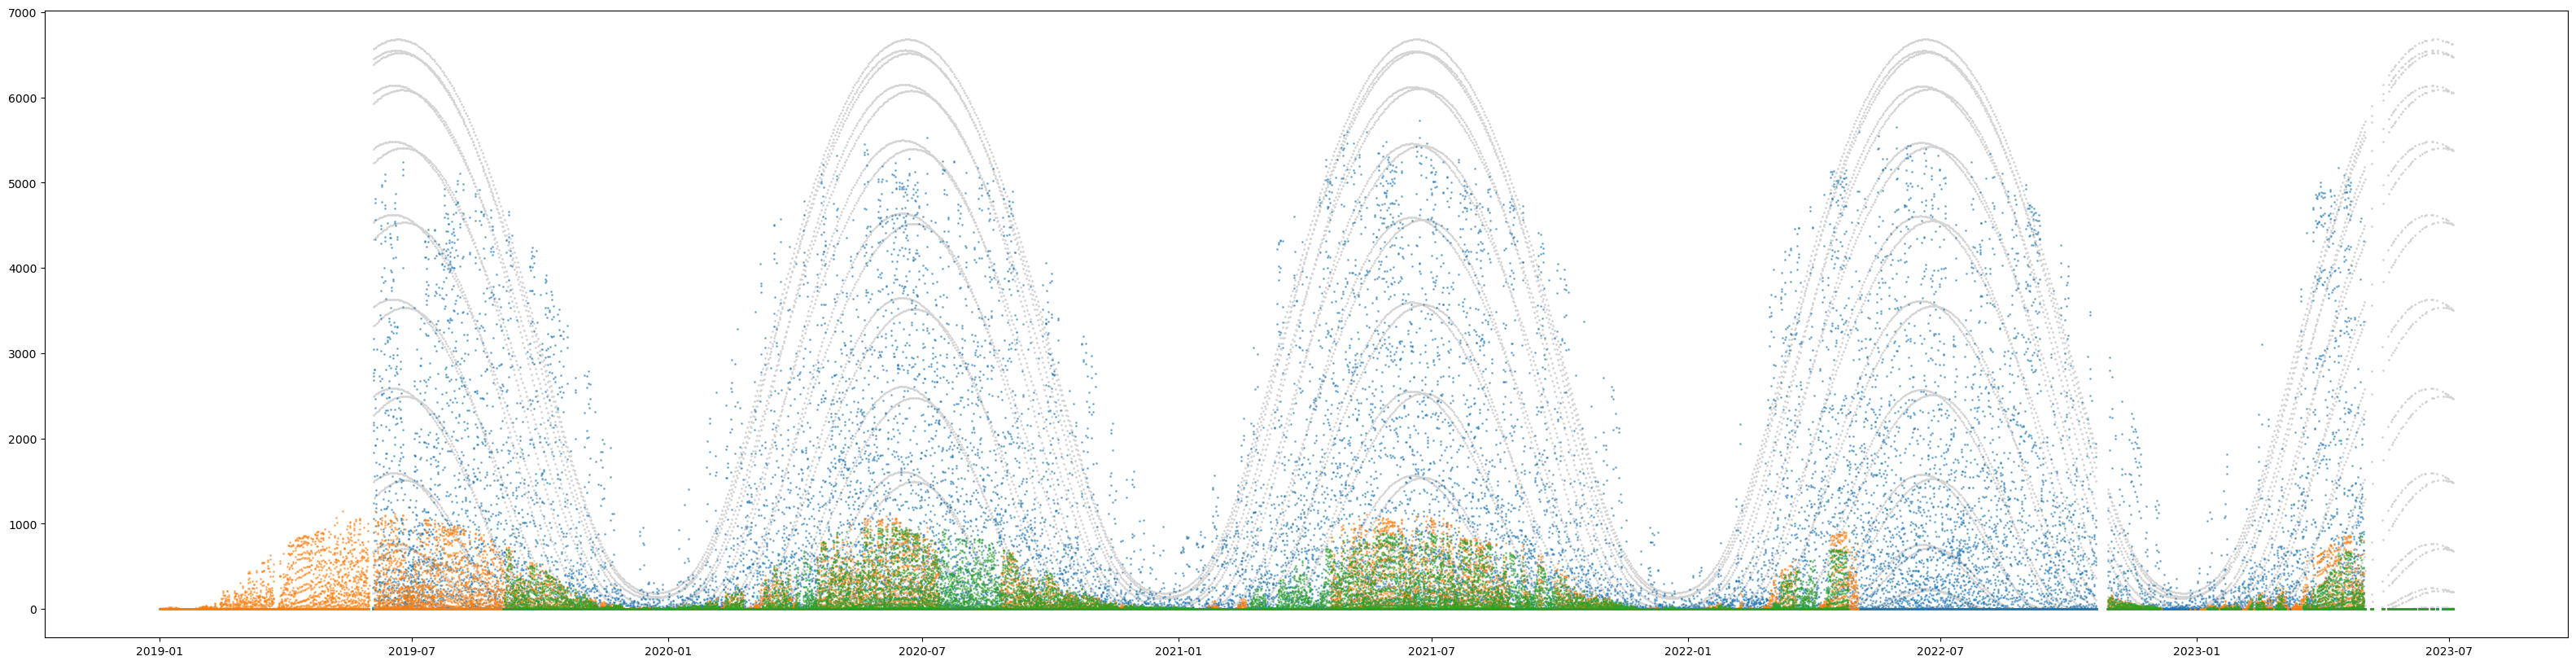

In [ ]:
# Plot alignment and values
plt.figure(figsize=(40, 10))

plt.scatter(
    data_simple[data_simple.location == "A"].date_forecast,
    data_simple[data_simple.location == "A"]["clear_sky_rad:W"] * 8,
    s=1,
    color="lightgrey",
)

for loc in locations:
    plt.scatter(
        data_simple[data_simple.location == loc].date_forecast,
        data_simple[data_simple.location == loc]["pv_measurement"],
        s=1,
        alpha=0.5,
    )

# 4 – Modeling

# 5 – Postprocessing